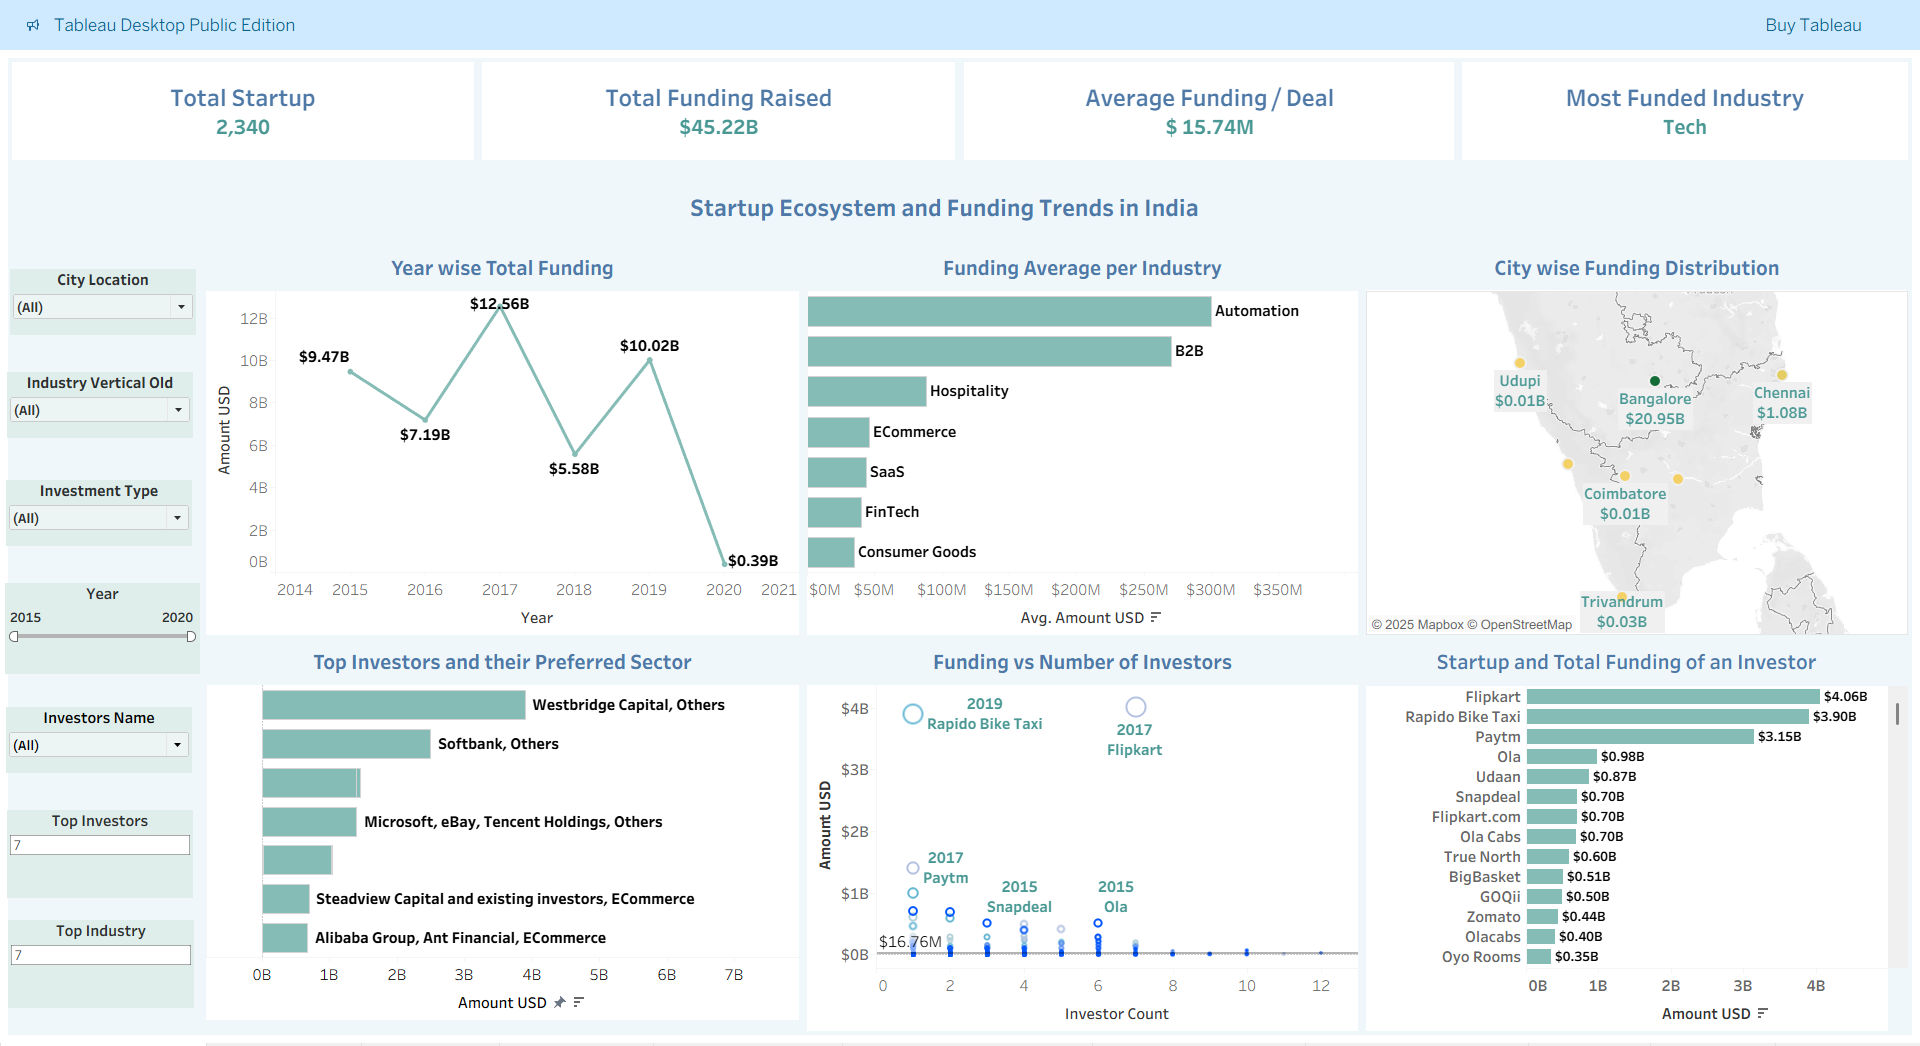

In [9]:
from IPython.display import Image, display

display(Image(r"C:\Users\Hitesh kumar\Downloads\Startup Analysis\Tableau\Tableau dashboard.png",width=1200))

# SECTION A: Python & Data Cleaning



---

1. Data Loading & Cleaning:

   - Loaded the dataset using pandas.

   - Renamed columns for consistency (Startup Name → Startup_Name, etc.).

   - Dropped unnecessary columns like Sr No.


---



In [405]:
import pandas as pd
import numpy as np

In [406]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [407]:
df.drop(columns='Sr No', inplace=True)
df.rename(columns={
    'Date dd/mm/yyyy': 'Date',
    'Startup Name': 'Startup_Name',
    'Industry Vertical': 'Industry_Vertical',
    'SubVertical': 'SubVertical',
    'City  Location': 'City_Location',
    'Investors Name': 'Investors_Name',
    'InvestmentnType': 'Investment_Type',
    'Amount in USD': 'Amount_USD',
    'Remarks': 'Remarks'
}, inplace=True)



---


2. Display structure, and Inspect Datatypes


---



In [408]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3044 non-null   object
 1   Startup_Name       3044 non-null   object
 2   Industry_Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City_Location      2864 non-null   object
 5   Investors_Name     3020 non-null   object
 6   Investment_Type    3040 non-null   object
 7   Amount_USD         2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [409]:
df.dtypes

,0
Date,object
Startup_Name,object
Industry_Vertical,object
SubVertical,object
City_Location,object
Investors_Name,object
Investment_Type,object
Amount_USD,object
Remarks,object


In [410]:
df.shape

(3044, 9)

In [411]:
df.describe()

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks
count,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,1035,2459,821,1942,112,2412,55,471,72
top,30/11/2016,Swiggy,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,11,8,941,11,700,39,1356,165,175


The describe() function is showing only the columns with data type as string (object) because right now, there are no numerical columns in the dataset.

After we convert the Amount_USD column to the correct numeric type, then describe() will show numerical statistics like:
- Count
- Mean
- Standard deviation
- Minimum and maximum
- Percentiles (25%, 50%, 75%)



---

3. Handling Missing Values:
   - Removed rows with missing Industry Vertical, since it's a crucial feature.
   - Filled missing values in SubVertical, City Location, and Investors Name with "Unknown" to maintain consistency.



---



In [412]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,171
SubVertical,936
City_Location,180
Investors_Name,24
Investment_Type,4
Amount_USD,960
Remarks,2625


In [413]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Remarks              86.235217
Amount_USD           31.537451
SubVertical          30.749014
City_Location         5.913272
Industry_Vertical     5.617608
Investors_Name        0.788436
Investment_Type       0.131406
Date                  0.000000
Startup_Name          0.000000
dtype: float64


In [414]:
df=df[~df['Industry_Vertical'].isnull()]
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,765
City_Location,9
Investors_Name,24
Investment_Type,4
Amount_USD,920
Remarks,2522


- About 5% of the rows had missing values in the Industry_Vertical column.
- Those same rows also had missing values in other columns.
- So, we dropped them to keep the dataset clean.




In [415]:
#Handling mising values.
df['SubVertical'] = df['SubVertical'].fillna('Unknown')
df['City_Location'] = df['City_Location'].fillna('Unknown')
df['Investors_Name'] = df['Investors_Name'].fillna('Unknown')

/tmp/ipython-input-4169340647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SubVertical'] = df['SubVertical'].fillna('Unknown')
/tmp/ipython-input-4169340647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Location'] = df['City_Location'].fillna('Unknown')
/tmp/ipython-input-4169340647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p



---


4. Data Formatting:
 - Handled categorical issues like inconsistent city names (Bangalore, Bengaluru, etc.).
 - Dates were converted to proper datetime format.
 - Currency values (Amount in USD) were cleaned (commas removed, converted to float).



---



In [416]:
df_NewCopy=df.copy()

In [417]:
df['Investment_Type'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding'], dtype=object)

In [418]:
investment_type_map = {
    # Seed / Angel
    'Seed': 'Seed Funding',
    'Seed Round': 'Seed Funding',
    'Seed funding': 'Seed Funding',
    'Seed Funding Round': 'Seed Funding',
    'Seed / Angel Funding': 'Seed Funding',
    'Seed/Angel Funding': 'Seed Funding',
    'Seed/ Angel Funding': 'Seed Funding',
    'Seed / Angle Funding': 'Seed Funding',
    'Seed/ Angel Funding': 'Seed Funding',
    'Angel': 'Angel Funding',
    'Angel Round': 'Angel Funding',
    'Angel Funding': 'Angel Funding',
    'Angel / Seed Funding': 'Seed Funding',

    # Series
    'Series A': 'Series A',
    'Pre-Series A': 'Pre-Series A',
    'Pre-series A': 'Pre-Series A',
    'pre-Series A': 'Pre-Series A',
    'pre-series A': 'Pre-Series A',
    'Pre Series A': 'Pre-Series A',
    'Series B': 'Series B',
    'Series B (Extension)': 'Series B',
    'Series C': 'Series C',
    'Series D': 'Series D',
    'Series E': 'Series E',
    'Series F': 'Series F',
    'Series G': 'Series G',
    'Series H': 'Series H',
    'Series J': 'Series J',

    # Venture/Private Equity
    'Venture': 'Venture Round',
    'Venture Round': 'Venture Round',
    'Venture - Series Unknown': 'Venture Round',
    'Private Equity': 'Private Equity',
    'Private Equity Round': 'Private Equity',
    'Private': 'Private Equity',
    'Private Funding': 'Private Equity',
    'PrivateEquity': 'Private Equity',

    # Debt
    'Debt Funding': 'Debt Funding',
    'Debt': 'Debt Funding',
    'Debt-Funding': 'Debt Funding',
    'Structured Debt': 'Debt Funding',
    'Term Loan': 'Debt Funding',
    'Debt and Preference capital': 'Debt Funding',

    # Other types
    'Funding Round': 'Other',
    'Corporate Round': 'Other',
    'Maiden Round': 'Other',
    'Single Venture': 'Other',
    'Bridge Round': 'Other',
    'Inhouse Funding': 'Other',
    'Equity': 'Other',
    'Equity Based Funding': 'Other',
    'Mezzanine': 'Other',
}
df['Investment_Type'] = df['Investment_Type'].str.strip()
df['Investment_Type'] = df['Investment_Type'].replace(investment_type_map)
df['Investment_Type'].value_counts()


/tmp/ipython-input-2288294934.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investment_Type'] = df['Investment_Type'].str.strip()
/tmp/ipython-input-2288294934.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investment_Type'] = df['Investment_Type'].replace(investment_type_map)


,count
Investment_Type,
Seed Funding,1454
Private Equity,1280
Debt Funding,30
Series A,24
Series B,21
Series C,14
Series D,12
Other,11
Pre-Series A,9


In [419]:
df['City_Location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'Unknown', 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'K

In [420]:
# Step 1: Remove encoding junk and trim
df['City_Location'] = df['City_Location'].astype(str).str.replace(r'\\x[a-zA-Z0-9]+', '', regex=True)
df['City_Location'] = df['City_Location'].str.replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['City_Location'] = df['City_Location'].str.strip()

# Step 2: Standardize entries using a mapping dictionary
city_map = {
    "Bangalore": "Bangalore",
    "Hyderabad": "Hyderabad",
    "Mumbai": "Mumbai",
    "Gurgaon": "Gurgaon",
    "Noida": "Noida",
    "Goa": "Goa",
    "Chennai": "Chennai",
    "Bangalore / SFO": "Bangalore",
    "New Delhi": "New Delhi",
    "Pune": "Pune",
    "New Delhi / California": "New Delhi",
    "Delhi": "New Delhi",
    "Unknown": "Unknown",
    "Chandigarh": "Chandigarh",
    "Pune / US": "Pune",
    "Udaipur": "Udaipur",
    "Ahmedabad": "Ahmedabad",
    "\\xc2\\xa0Gurgaon": "Gurgaon",
    "\\xc2\\xa0New Delhi": "New Delhi",
    "\\xc2\\xa0Bangalore": "Bangalore",
    "\\xc2\\xa0Noida": "Noida",
    "Coimbatore": "Coimbatore",
    "Nagpur": "Nagpur",
    "\\xc2\\xa0Mumbai": "Mumbai",
    "Kanpur": "Kanpur",
    "India / US": "Unknown",
    "Mumbai / Global": "Mumbai",
    "Kolkata": "Kolkata",
    "Jaipur": "Jaipur",
    "New Delhi/ Houston": "New Delhi",
    "New Delhi / US": "New Delhi",
    "Bangalore / USA": "Bangalore",
    "Gurgaon / SFO": "Gurgaon",
    "US/India": "Unknown",
    "Bhopal": "Bhopal",
    "New York/ India": "Unknown",
    "Bangalore / San Mateo": "Bangalore",
    "Pune / Singapore": "Pune",
    "Singapore": "Unknown",
    "Chennai/ Singapore": "Chennai",
    "Belgaum": "Belgaum",
    "Goa/Hyderabad": "Goa",
    "Bangalore/ Bangkok": "Bangalore",
    "Noida / Singapore": "Noida",
    "USA/India": "Unknown",
    "Vadodara": "Vadodara",
    "Gwalior": "Gwalior",
    "Mumbai / NY": "Mumbai",
    "Boston": "Unknown",
    "Hyderabad/USA": "Hyderabad",
    "Bangalore / Palo Alto": "Bangalore",
    "Udupi": "Udupi",
    "Dallas / Hyderabad": "Hyderabad",
    "London": "Unknown",
    "Jodhpur": "Jodhpur",
    "Mumbai / UK": "Mumbai",
    "Indore": "Indore",
    "Pune / Dubai": "Pune",
    "Varanasi": "Varanasi",
    "Pune/Seattle": "Pune",
    "Seattle / Bangalore": "Bangalore",
    "Agra": "Agra",
    "Kochi": "Kochi",
    "Hubli": "Hubli",
    "Kerala": "Unknown",
    "\\\\" : "Unknown",
    "\\\\ Delhi": "New Delhi",
    "Kozhikode": "Kozhikode",
    "US": "Unknown",
    "Siliguri": "Siliguri",
    "USA": "Unknown",
    "Lucknow": "Lucknow",
    "Trivandrum": "Trivandrum",
    "SFO / Bangalore": "Bangalore",
    "Bengaluru": "Bangalore",
    "Panaji": "Panaji",
    "Missourie": "Unknown",
    "Surat": "Surat",
    "Gaya": "Gaya",
    "Uttar Pradesh": "Unknown",
    "Nw Delhi": "New Delhi",
    "Karur": "Karur",
    "Gurugram": "Gurgaon",
    "Bhubneswar": "Bhubaneswar",
    "Kolkatta": "Kolkata",
    "Delhi & Cambridge": "New Delhi",
    "India/US": "Unknown",
    "Rourkela": "Rourkela",
    "India": "Unknown",
    "Mumbai/Bengaluru": "Mumbai",
    "California": "Unknown",
    "New York, Bengaluru": "Bangalore",
    "Ahemadabad": "Ahmedabad",
    "Ahemdabad": "Ahmedabad",
    "Faridabad": "Faridabad",
    "Bhubaneswar": "Bhubaneswar",
    "Srinagar": "Srinagar",
    "Nairobi": "Unknown",
    "Haryana": "Unknown",
    "Andheri": "Mumbai",
    "Chembur": "Mumbai",
    "Taramani": "Chennai",
    "Kormangala": "Bangalore",
    "Santa Monica": "Unknown",
    "San Francisco": "Unknown",
    "Karnataka": "Unknown",
    "San Jose,": "Unknown",
    "Menlo Park": "Unknown",
    "Burnsville": "Unknown",
    "New York": "Unknown",
    "Bengaluru and Gurugram": "Bangalore",
    "Tulangan": "Tulangan",
    "Amritsar": "Amritsar",
    "Palo Alto": "Unknown",
    "India/Singapore": "Unknown"
}



df['City_Location'] = df['City_Location'].replace(city_map)

# Optional: Capitalize first letters and clean up any whitespace again
df['City_Location'] = df['City_Location'].str.title().str.strip()


/tmp/ipython-input-470262772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Location'] = df['City_Location'].astype(str).str.replace(r'\\x[a-zA-Z0-9]+', '', regex=True)
/tmp/ipython-input-470262772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Location'] = df['City_Location'].str.replace(r'\\\\xc2\\\\xa0', '', regex=True)
/tmp/ipython-input-470262772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [421]:
df[df['Investment_Type'].isna()]

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks
30,19/11/2019,Furtados School of Music,Education,Music Education,Tulangan,IAN Fund and DSG Consumer Partners,NaN,"20,00,00,000",NaN
76,03/06/2019,FabHotels,E-Commerce,Hospitality,Gurgaon,"Goldman Sachs, Accel Partners and Qualcomm",NaN,"48,89,975.54",NaN
81,06/06/2019,Sistema.bio,Agriculture,Hybrid Reactor Biodigestor,Unknown,"Shell Foundation, DILA CAPITAL, Engie RDE Fund...",NaN,"27,39,034.68",NaN
1562,21/07/2016,Drums Food,Food & Beverage,Yogurt and Ice Cream maker,Mumbai,"Verlinvest, DSG Consumer Partners",NaN,NaN,NaN


- We saw that the Investment_Type column has missing values in some Industry_Vertical categories.
- To fill them, we will use the mode (most common value) of Investment_Type within each Industry_Vertical.

In [422]:
DF_1=df[(df['Industry_Vertical']=='E-Commerce')| (df['Industry_Vertical']=='E-Commerce') | (df['Industry_Vertical']=='Agriculture') | (df['Industry_Vertical']=='Food & Beverages')]
DF_1.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks
8,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
12,16/12/2019,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bangalore,Vertex Growth Fund,Series E,"3,00,00,000",NaN
16,20/12/2019,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,"23,10,00,000",NaN
27,19/11/2019,Digital Mall Asia,E-Commerce,Virtual e-commerce platform,New Delhi,Amour Infrastructure,Seed Funding,"22,00,00,000",NaN
44,01/08/2019,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"2,00,00,000",NaN


In [423]:
DF_IType_MODE= DF_1.groupby('Industry_Vertical')['Investment_Type'].value_counts()
DF_IType_MODE

Industry_Vertical  Investment_Type
Agriculture        Seed Funding        1
E-Commerce         Private Equity     11
                   Seed Funding        6
                   Series D            4
                   Debt Funding        2
                   Series C            2
                   Series E            1
                   Series F            1
                   Series G            1
Food & Beverages   Seed Funding        3
Name: count, dtype: int64

In [424]:
def fill_investment_type(row):
    if pd.isnull(row['Investment_Type']):
        if row['Industry_Vertical'] == 'Agriculture':
            return 'Seed Funding'
        elif row['Industry_Vertical'] == 'E-Commerce':
            return 'Private Equity'
        elif row['Industry_Vertical'] == 'Food & Beverages':
            return 'Venture Funding'
        else:
            return 'Seed Funding'
    else:
        return row['Investment_Type']

# Apply the function to fill missing values
df['Investment_Type'] = df.apply(fill_investment_type, axis=1)

In [425]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,0
City_Location,0
Investors_Name,0
Investment_Type,0
Amount_USD,920
Remarks,2522


In [426]:
df['Industry_Vertical'].value_counts()

,count
Industry_Vertical,
Consumer Internet,941
Technology,478
eCommerce,186
Healthcare,70
Finance,62
...,...
Developer Portfolio Showcase platform,1
Doctors Network Mobile App,1
End-to-End Lending platform,1


In [427]:
industry_mapping = {
    # --- FOOD & BEVERAGE, DELIVERY, RESTAURANTS ---
    "Online Food Delivery": "FoodTech",
    "Online Food Ordering": "FoodTech",
    "Online Food Ordering Marketplace": "FoodTech",
    "Online Food ordering & Delivery": "FoodTech",
    "Online Food ordering & Delivery service": "FoodTech",
    "Online Food Ordering & Delivery platform": "FoodTech",
    "Food Delivery Platform": "FoodTech",
    "Food Delivery platform": "FoodTech",
    "Food Discovery App": "FoodTech",
    "Food Discovery & Delivery Mobile app": "FoodTech",
    "Chinese food delivery": "FoodTech",
    "Healthy Food Online Community": "FoodTech",
    "Healthy Food Manufacturer": "FoodTech",
    "Gourmet Food Discovery & Delivery platform": "FoodTech",
    "Gourmet Meals Delivery": "FoodTech",
    "Hyperlocal Grocery App": "FoodTech",
    "Hyperlocal Grocery Delivery": "FoodTech",
    "Hyperlocal Grocery Delivery Service": "FoodTech",
    "Raw Meat & Ready to eat food etailer": "FoodTech",
    "Home Cooked Food marketplace & Delivery": "FoodTech",
    "Home Made Food Marketplace": "FoodTech",
    "Food Subscription platform": "FoodTech",
    "Hyperlocal food & grocery store": "FoodTech",
    "Online Grocery platform": "FoodTech",
    "Hyper-Local Online/Mobile Grocery": "FoodTech",
    "Online Grocers": "FoodTech",
    "Grocery Delivery platform": "FoodTech",
    "Used Vehicle Marketplace": "Auto",
    "Used Car Marketplace": "Auto",
    "Used Bikes Marketplace": "Auto",
    "Online Grocery Store": "FoodTech",
    "Online Meat Ordering platform": "FoodTech",
    "Hyper-local Grocery Delivery platform": "FoodTech",
    "Hyperlocal Online Home services provider": "Services",
    "Hyperlocal Goods marketplace": "Marketplace",
    "Affordable Hotel Booking Online": "Hospitality",
    "Budget Hotel Accommodation": "Hospitality",
    # ------------------ LOGISTICS, TRANSPORT, RENTALS ------------
    "Last Mile Delivery Service": "Logistics",
    "Last Mile Logistics": "Logistics",
    "Logistics Intelligence": "Logistics",
    "On-Demand Logistics Service": "Logistics",
    "Freight logistics platform": "Logistics",
    "End-to-end Logistics platform": "Logistics",
    "Logistics Automation Platform": "Logistics",
    "Logistics service platform": "Logistics",
    "Logistics Service Provider Marketplace": "Logistics",
    "Logistics Solution Provider": "Logistics",
    "B2B logistics delivery platform": "Logistics",
    "Express local delivery platform": "Logistics",
    "Hyperlocal Delivery Services": "Logistics",
    "Hyperlocal Delivery Platform": "Logistics",
    "Hyperlocal Logistics Service": "Logistics",
    "Hyperlocal Logistics Service Provider": "Logistics",
    "On-demand delivery service": "Logistics",
    "On-Demand Delivery Logistics": "Logistics",
    "Delivery & Logistics Service provider": "Logistics",
    "Logistics Services Provider": "Logistics",
    "Hyper local logistics platform": "Logistics",
    "On-Demand Local Logistics provider": "Logistics",
    "Logistics Tech": "Logistics",
    "Logistics Tech Platform": "Logistics",
    "Online Logistics Platform": "Logistics",
    "Cab Aggregator": "Transport",
    "Cab Booking app platform": "Transport",
    "Taxi Rental platform": "Transport",
    "Cab rental Mobile app": "Transport",
    "Car & Bike ecommerce platform": "Auto",
    "Bike Rental Platform": "Transport",
    "Self-driven Car rental": "Transport",
    "Self Driven Car rental": "Transport",
    "Self-driven vehicle rental": "Transport",
    "Self Driven Rental Car Platform": "Transport",
    "Car Aggregator & Retail Mobile App": "Auto",
    "On-Demand Handyman Services": "Services",
    "On demand cleaning & fixing services": "Services",
    "On-Demand Beauty Service": "Beauty",
    "On-Demand Beauty Services": "Beauty",
    "Beauty & Wellness Mobile App": "Beauty",
    "Beauty & Lifestyle Mobile Marketplace": "Beauty",
    "Beauty services Mobile Marketplace": "Beauty",
    "Beauty and Wellness platform": "Beauty",
    "Beauty and Wellness Marketplace": "Beauty",
    "Beauty and Wellness Platform": "Beauty",
    "Health, Wellness & Beauty Services App": "Beauty",
    # --------------- E-COMMERCE -------------------
    "eCommerce platform": "ECommerce",
    "ecommerce": "ECommerce",
    "E-Commerce": "ECommerce",
    "ECommerce": "ECommerce",
    "Ecommerce": "ECommerce",
    "E-Commerce & M-Commerce platform": "ECommerce",
    "FMCG": "Consumer Goods",
    "Ecommerce Marketplace": "ECommerce",
    "Online Marketplace": "ECommerce",
    "Online Marketplace for Industrial Goods": "ECommerce",
    "Hyper-Local Ecommerce": "ECommerce",
    "Hyperlocal Shopping App": "ECommerce",
    "Industrial Supplies B2B ecommerce": "ECommerce",
    "Hyperlocal electronics repair Service": "ECommerce",
    "Ecommerce Marketplace": "ECommerce",
    "Online Shopping Assistant Mobile app": "ECommerce",
    "Ecommerce Brands’ Full Service Agency": "ECommerce",
    "Ecommerce Marketing Software Platform": "ECommerce",
    "Ecommerce returns etailer": "ECommerce",
    "Digital / Mobile Wallet": "FinTech",
    "Mobile Commerce Platform": "ECommerce",
    "Mobile Only Shopping Assistant": "ECommerce",
    "Fashion jewelry and accessories e-tailer": "Fashion",
    "Online Branded Furniture etailer": "ECommerce",
    "Indian Ethnic Crafts Etailer": "ECommerce",
    "Mobile Commerce for Farmers": "ECommerce",
    "Online Grocery Delivery": "FoodTech",
    "Online home décor marketplace": "Home Decor",
    "Online Home D\xe9cor": "Home Decor",
    "Home Furnishing Solutions": "Home Decor",
    "Online Furniture Marketplace": "Home Decor",
    "Online Furniture ecommerce": "Home Decor",
    "Custom Furniture Marketplace": "Home Decor",
    "Pre-owned games Marketplace": "ECommerce",
    # --------------- EDUCATION --------------------
    "Online Education Platform": "EdTech",
    "Online Learning Platform": "EdTech",
    "Online Education Marketplace": "EdTech",
    "Education Marketplace": "EdTech",
    "Education Content Provider": "EdTech",
    'E-Tech':'EdTech',
    "EdTech": "EdTech",
    "Ed-Tech": "EdTech",
    "Edtech": "EdTech",
    "Education": "EdTech",
    "Online Ed-Tech Platform": "EdTech",
    "Competitive exam learning platform": "EdTech",
    "Teacher empowerment platform": "EdTech",
    "Exam Preparation Platform": "EdTech",
    "Online Certification Courses": "EdTech",
    "Online Student & Campus Social Networking platform": "EdTech",
    "Skill Training & Placement Platform": "EdTech",
    "Multilingual Test Preparation Platform": "EdTech",
    "Government Test Preparation platform": "EdTech",
    "Test Automation SAAS platform": "EdTech",
    "Technology": "Technology",
    # ------------ HEALTHCARE, WELLNESS, LIFE SCIENCES ------
    "Healthcare": "Healthcare",
    "Health Care": "Healthcare",
    "healthcare": "Healthcare",
    "Health": "Healthcare",
    "Health-Tech platform": "Healthcare",
    "Healthcare Consulting platform": "Healthcare",
    "Online Pharmacy": "Healthcare",
    "Home Healthcare Services platform,": "Healthcare",
    "Home Medical Care Services": "Healthcare",
    "Healthcare IT Solutions & services": "Healthcare",
    "Healthcare Services Discovery platform": "Healthcare",
    "Diagnostics Labs aggregator platform": "Healthcare",
    "Prepaid Bill manager App": "FinTech",
    "App Analytics platform": "Analytics",
    "Online Medical Diagnostic": "Healthcare",
    "Preventive healthcare services": "Healthcare",
    "Preventive Healthcare Services": "Healthcare",
    # ------------------- FASHION, LIFESTYLE, BEAUTY -----------
    "Online Fashion Aggregator": "Fashion",
    "Fashion Ecommerce store": "Fashion",
    "Fashion ECommerce": "Fashion",
    "Private Label lingerie Ecommerce": "Fashion",
    "Online Lingerie platform": "Fashion",
    "Online Lingerie Marketplace": "Fashion",
    "Womens Fashion Wear Portal": "Fashion",
    "Designer fashion Jewellery Marketplace": "Fashion",
    "Designer Merchandize Marketplace": "Fashion",
    "Online Jewelry Store": "Fashion",
    "Online Jewellery Store": "Fashion",
    "Online Jewellery etailer": "Fashion",
    "Celebrity Fashion Brand": "Fashion",
    "Fashion Search & Review Platform": "Fashion",
    "Online Apparels Fashion brand": "Fashion",
    "Luxury Apparel rental": "Fashion",
    "pre-owned Luxury online apparel seller": "Fashion",
    "Private label Fashion eTailer": "Fashion",
    "Personalized Styling platform": "Fashion",
    "Fashion Discovery platform": "Fashion",
    "Ethnic/ Traditional Fashion Store": "Fashion",
    "Women Lifestyle Marketplace": "Fashion",
    "Women Ethnic Wear Online Marketplace": "Fashion",
    "Ethnic Beverages manufacturer": "Food & Beverage",
    # ------------------- MARKETPLACE & GENERAL ----------------
    "Marketplace": "Marketplace",
    "Home rental platform": "Marketplace",
    "Professional Services Marketplace": "Marketplace",
    "Performance based Wholesale Marketplace": "Marketplace",
    "Curated Freelancer Marketplace": "Marketplace",
    "Fund Raising Platform": "FinTech",
    "Startup Funding platform": "FinTech",
    "FinTech": "FinTech",
    "Fintech": "FinTech",
    "Financial Inclusion platform": "FinTech",
    "Financial Tech": "FinTech",
    "Financial Services Platform": "FinTech",
    "Financial Services Portal": "FinTech",
    "Finance": "FinTech",
    "NBFC": "FinTech",
    "BFSI": "FinTech",
    # ---------- CONSUMER INTERNET, OTHERS, GENERAL -----------
    "Consumer Internet": "Consumer Internet",
    "Consumer internet": "Consumer Internet",
    "Consumer Interne": "Consumer Internet",
    "Consumer Goods": "Consumer Goods",
    "Consumer Portal": "Consumer Internet",
    "Internet Network Infrastructure Services": "Technology",
    # ------------ TECHNOLOGY: IT, CLOUD, DATA, SAAS ---------
    "Cloud Data Integration Platform": "Technology",
    "Tech": "Technology",
    "IT": "Technology",
    "IT / Customer Engagement Consulting": "Technology",
    "Digital Media Platform": "Media",
    "Digital Media publishing platform": "Media",
    "Media": "Media",
    "Publishing": "Media",
    "Cloud Based Collaboration platform": "Technology",
    "AI": "Artificial Intelligence",
    "Artificial Intelligence": "Artificial Intelligence",
    # ------------ OTHER BUCKETS, TERMS, & PLACEHOLDER LABELS ----
    "Others": "Others",
    "Reality": "Real Estate",
    "Real Estate": "Real Estate",
    "Real Estate focused Tech platform": "Real Estate",
    "Real Estate Broker network App": "Real Estate",
    "Real Estate Broker Platform App": "Real Estate",
    "Real Estate Intelligence Platform": "Real Estate",
    "Food": "FoodTech",
    "Food and Beverage": "FoodTech",
    "Food-Tech": "FoodTech",
    "Food and Beverages": "FoodTech",
    "Food & Beverage": "FoodTech",
    "Food & Beverages": "FoodTech",
    "Hospitality": "Hospitality",
    "Retail": "Retail",
    "FMCG": "Consumer Goods",
    "Ed-Tech": "EdTech",
    "SaaS": "SaaS",
    "Saas": "SaaS",
    "SaaS, Ecommerce": "SaaS",
    "B2B": "B2B",
    "B2B Platform": "B2B",
    "B2B-focused foodtech startup": "FoodTech",
    "Online Education": "EdTech",
    "Services Platform": "Services",
    "Services": "Services",
    "Automation": "Automation",
    "Clean Tech": "CleanTech",
    "Clean-tech": "CleanTech",
    "Big Data & Analytics Services": "Analytics",
    "Big Data & Analytics platform": "Analytics",
    "Big Data Analytics Platform": "Analytics",
    "Big Data Management Platform": "Analytics",
    "Data Analytics Platform": "Analytics",
    "Analytics": "Analytics",
    "Video Games": "Gaming",

}


df['Industry_Vertical'] = df['Industry_Vertical'].map(industry_mapping).fillna('Others')


In [428]:
#check all type in which date is filled

import re       # Check for all strings NOT matching dd/mm/yyyy pattern
invalid_format = df[~df['Date'].astype(str).str.match(r'^\d{2}/\d{2}/\d{4}$')]       # Keep values that do NOT match the pattern dd/mm/yyyy

print(invalid_format['Date'].unique())

['05/072018' '01/07/015' '\\\\xc2\\\\xa010/7/2015' '12/05.2015'
 '13/04.2015']


In [429]:
df['Date'].iloc[[192,2571,2606]]

,Date
192,05/072018
2571,01/07/015
2606,\\xc2\\xa010/7/2015


In [430]:
df.loc[192, 'Date'] = '05/07/2018'
df.loc[2571, 'Date'] = '01/07/2015'
df.loc[2606, 'Date'] = '10/07/2015'

In [431]:
df['Date'].iloc[[192,2571,2606]]

,Date
192,05/07/2018
2571,01/07/2015
2606,10/07/2015


In [432]:
# 1. Remove encoding junk like '\\x..'
df['Date'] = df['Date'].str.replace(r'\\x[a-zA-Z0-9]+', '', regex=True)

# 2. Remove other encoded junk like '\\\\xc2\\\\xa0'
df['Date'] = df['Date'].str.replace(r'\\\\[a-zA-Z0-9]+', '', regex=True)

# 3. Replace dots with slashes: 12/05.2015 → 12/05/2015
df['Date'] = df['Date'].str.replace(r'\.', '/', regex=True)

# 4. Fix 'dd/mmYYYY' → insert missing slash: 05/072018 → 05/07/2018
df['Date'] = df['Date'].str.replace(r'(\d{2})/(\d{5})', r'\1/0\2', regex=True)

# 5. Fix 2-digit years: 01/07/015 → 01/07/2015
df['Date'] = df['Date'].str.replace(r'(\d{2})/(\d{2})/(\d{2})$', r'\1/\2/20\3', regex=True)

# 6. Remove any leading/trailing whitespace
df['Date'] = df['Date'].str.strip()

# 7. Convert to datetime safely
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [433]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,0
City_Location,0
Investors_Name,0
Investment_Type,0
Amount_USD,920
Remarks,2522


In [434]:
df['Amount_USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [435]:
import pandas as pd
import numpy as np

# Assume df['Amount'] is your column
def clean_amount(val):
    if pd.isna(val):
        return np.nan

    val = str(val).strip()

    # Remove unwanted encodings and whitespace
    val = re.sub(r'\\x[a-zA-Z0-9]+', '', val)       # Remove \x-type encodings
    val = re.sub(r'\\\\[a-zA-Z0-9]+', '', val)      # Remove \\xc2\\xa0 etc.
    val = val.replace('+', '')                      # Remove '+' sign
    val = val.replace(',', '')                      # Remove all commas
    val = val.strip().rstrip('.')                   # Strip and remove trailing dot/comma

    # Convert known bad labels to NaN
    if val.lower() in ['undisclosed', 'unknown', 'n/a', 'na', '']:
        return np.nan

    try:
        return float(val)
    except:
        return np.nan

# Apply the function
df['Amount_USD'] = df['Amount_USD'].apply(clean_amount)
df['Amount_USD']

,Amount_USD
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0
...,...
2868,3500000.0
2869,NaN
2870,400000.0
2871,500000.0


In [436]:
df['Amount_USD'] = pd.to_numeric(df['Amount_USD'], errors='coerce')

In [437]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,0
City_Location,0
Investors_Name,0
Investment_Type,0
Amount_USD,938
Remarks,2522


In [438]:
df2= df.groupby('Investment_Type')['Amount_USD'].mean()
print(df2)

Investment_Type
Angel Funding     2.323025e+05
Debt Funding      6.600799e+06
Other             1.464471e+08
Pre-Series A      5.546500e+06
Private Equity    2.579555e+07
Seed Funding      1.529113e+06
Series A          9.236364e+06
Series B          2.288188e+08
Series C          7.462274e+07
Series D          1.234832e+08
Series E          1.650000e+07
Series F          4.500000e+07
Series G          2.310000e+08
Series H          1.500000e+08
Series J          1.000000e+06
Venture Round     6.956200e+06
Name: Amount_USD, dtype: float64


In [439]:
# Your mapping (convert to dictionary)
investment_avg = {
    'Angel Funding': 2.323025e+05,
    'Debt Funding': 6.600799e+06,
    'Other': 1.464471e+08,
    'Pre-Series A': 5.546500e+06,
    'Private Equity': 2.579555e+07,
    'Seed Funding': 1.529113e+06,
    'Series A': 9.236364e+06,
    'Series B': 2.288188e+08,
    'Series C': 7.462274e+07,
    'Series D': 1.234832e+08,
    'Series E': 1.650000e+07,
    'Series F': 4.500000e+07,
    'Series G': 2.310000e+08,
    'Series H': 1.500000e+08,
    'Series J': 1.000000e+06,
    'Venture Round': 6.956200e+06
}

# Assume df['Cleaned_Amount'] has NaN and df['Investment_Type'] exists

# Fill NaNs using the investment type mapping
df['Amount_USD'] = df['Amount_USD'].fillna(
    df['Investment_Type'].map(investment_avg)
)


In [440]:
df['Remarks'] = df['Remarks'].fillna('No Remark')

In [441]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,0
City_Location,0
Investors_Name,0
Investment_Type,0
Amount_USD,0
Remarks,0


In [442]:
df['Amount_USD'].describe()

,Amount_USD
count,2.873000e+03
mean,1.573887e+07
std,1.031591e+08
min,1.800000e+04
25%,1.000000e+06
50%,1.529113e+06
75%,1.000000e+07
max,3.900000e+09




---
5. Feature Engineering:

  - Extracted year from the Date column for trend analysis.
  - sort by year
  - Counted number of investors by splitting the Investors Name field using commas.


---




In [443]:
df['Year'] = df['Date'].dt.year
df=df.sort_values(by='Year', ascending=False)
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020
4,2020-01-02,Fashor,Others,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020
1,2020-01-13,Shuttl,Others,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020
2,2020-01-09,Mamaearth,Others,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020


In [444]:
#new column to categorize Amount as low high and mid
df['Amount_USD'].median()

1529113.0

In [445]:
amount_category=df['Amount_USD']
def amount_category_fun(amount):
  if amount < 1_000_000:
    return 'Low'
  elif amount <= 10_000_000:
    return 'Medium'
  else:
    return 'High'
df['amount_category']=amount_category.apply(amount_category_fun)

In [446]:
df['amount_category'].value_counts()

,count
amount_category,
Medium,1502
Low,697
High,674


In [447]:
Investors_name_df=df['Investors_Name']
def investor_count_func(name):
  name_list=name.split(',')
  return len(name_list)
df['investor_count']=Investors_name_df.apply(investor_count_func)

In [448]:
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020,High,1
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
4,2020-01-02,Fashor,Others,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1
1,2020-01-13,Shuttl,Others,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
2,2020-01-09,Mamaearth,Others,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1


In [449]:
df.isnull().sum()

,0
Date,0
Startup_Name,0
Industry_Vertical,0
SubVertical,0
City_Location,0
Investors_Name,0
Investment_Type,0
Amount_USD,0
Remarks,0
Year,0


In [450]:
df.describe()

,Date,Amount_USD,Year,investor_count
count,2873,2.873000e+03,2873.000000,2873.000000
mean,2016-10-26 20:11:26.668987136,1.573887e+07,2016.314306,1.920640
min,2015-04-03 00:00:00,1.800000e+04,2015.000000,1.000000
25%,2015-12-11 00:00:00,1.000000e+06,2015.000000,1.000000
50%,2016-08-24 00:00:00,1.529113e+06,2016.000000,1.000000
75%,2017-07-03 00:00:00,1.000000e+07,2017.000000,2.000000
max,2020-01-13 00:00:00,3.900000e+09,2020.000000,10.000000
std,NaN,1.031591e+08,1.106952,1.422548


# Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D


In [3]:
df=pd.read_csv(r"C:\Users\Hitesh kumar\Downloads\cleaned2_Startup_funding.csv")
df

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020,High,1
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,25000000.0,Late Stage,2015,High,1
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,1529113.0,No Remark,2015,Medium,1
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,25795550.0,Series D,2015,High,2
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,10000000.0,Series B,2015,Medium,1


## Plot bar charts of startup count per city and industry 

### Graph

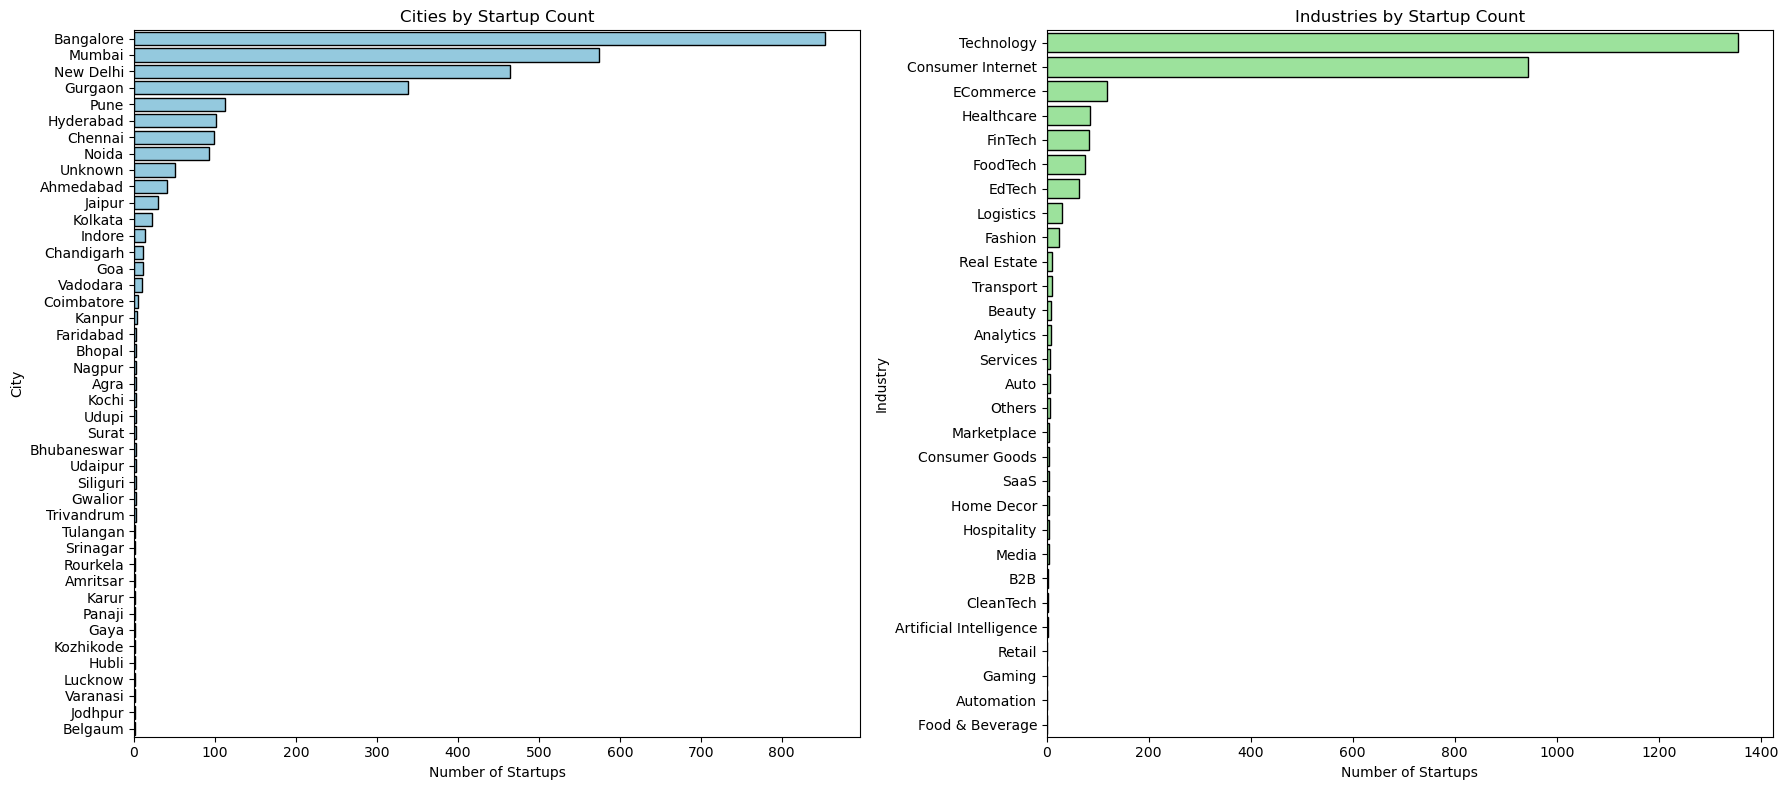

In [4]:
# Plot
plt.figure(figsize=(18, 8))

# City
plt.subplot(1, 2, 1)                            #Creates the first subplot in a 1-row, 2-column layout (1, 2, 1 means: 1st subplot).
top_cities = df['City_Location'].value_counts() #value_counts() returns a sorted Series with cities and their startup counts.
sns.barplot(x=top_cities.values, y=top_cities.index,color='skyblue',edgecolor='black') #horizontal bar chart
plt.title('Cities by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('City')

# Industry
plt.subplot(1, 2, 2)
top_industries = df['Industry_Vertical'].value_counts()
sns.barplot(x=top_industries.values, y=top_industries.index,color='lightgreen',edgecolor='black')
plt.title('Industries by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')

plt.tight_layout()  # adjusts spacing between plots so labels and titles don’t overlap.
plt.show()

### Insights

Cities by Startup Count: 
- Bangalore leads as India's startup capital, driven by tech talent, VCs, and innovation hubs.
- Mumbai, Delhi, and Gurgaon follow — strong in fintech, e-commerce, and corporate-backed ventures.
- Hyderabad, Pune, and Chennai are emerging ecosystems with growing infrastructure and state support.
- Tier 2/3 cities show limited but rising activity, signaling future growth potential.

Industries by Startup Count:
- E-commerce, Fintech, and Tech dominate, fueled by India’s digital adoption.
- Healthcare and Ed-tech surged post-COVID, reflecting innovation in remote services.
- Transport, FoodTech, and Business Services highlight urban demand and gig economy trends.

## Line chart of total funding amount per year (trendline)

### Graph

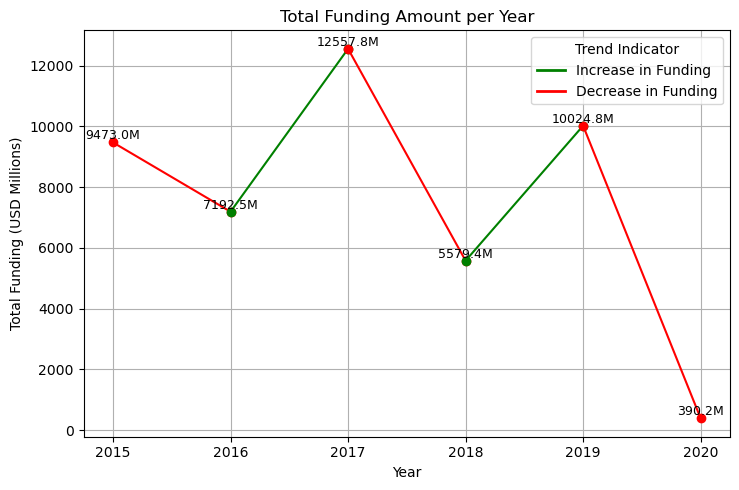

In [5]:
# Prepare data
funding_per_year = df.groupby('Year')['Amount_USD'].sum().reset_index()
funding_per_year['Amount_Millions'] = funding_per_year['Amount_USD'] / 1_000_000

years = funding_per_year['Year'].values
amounts = funding_per_year['Amount_Millions'].values

# Plot
plt.figure(figsize=(7.5, 5))
plt.title('Total Funding Amount per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD Millions)')
plt.grid(True)

# Plot each segment in red or green
for i in range(1, len(years)):
    x_vals = [years[i-1], years[i]]
    y_vals = [amounts[i-1], amounts[i]]
    color = 'green' if amounts[i] >= amounts[i-1] else 'red'
    plt.plot(x_vals, y_vals, marker='o', color=color)

# Annotate points
for i in range(len(years)):
    plt.text(x=years[i],y=amounts[i],s=f'{amounts[i]:.1f}M',ha='center',va='bottom',fontsize=9,color='black')

# Custom legend
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Increase in Funding'),
    Line2D([0], [0], color='red', lw=2, label='Decrease in Funding')
]
plt.legend(handles=legend_elements, loc='upper right', title='Trend Indicator', frameon=True)
plt.tight_layout()
plt.show()

### Insights

Total Funding Trend (2015–2020)

Growth Years
- Reflect positive momentum in the startup ecosystem
- Rise of high-growth sectors (fintech, edtech, SaaS)
- Policy support (e.g., Startup India)
- Entry of international investors

Decline Years
- Indicate caution or correction phases
- Market corrections or overvaluation concerns
- Economic slowdown, investor hesitation
- Pandemic-related disruptions

## Box plots comparing funding amounts across cities

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_10028\1297450475.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')


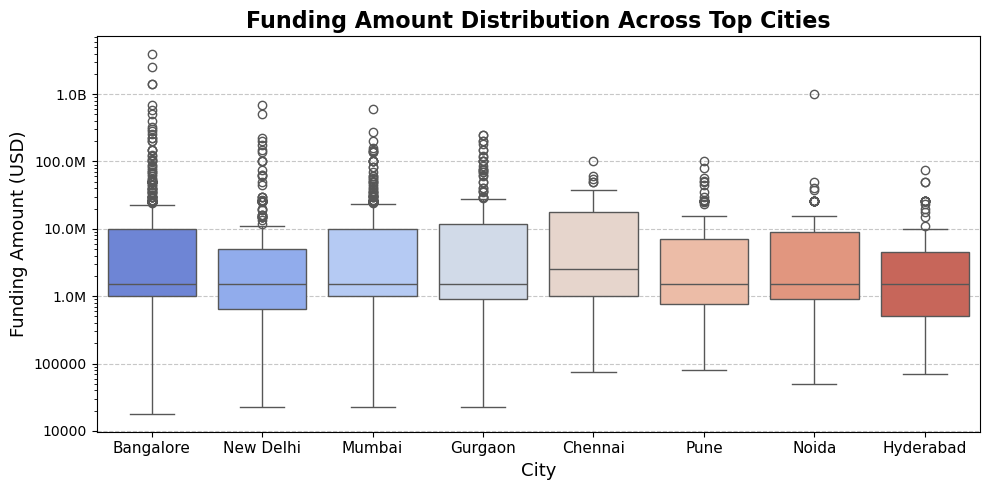

In [6]:
top_cities_list = df['City_Location'].value_counts().head(8).index
df_top_cities = df[df['City_Location'].isin(top_cities_list)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')

# Use log scale for y-axis to handle outliers
plt.yscale('log')
plt.xticks( fontsize=11)

plt.title('Funding Amount Distribution Across Top Cities', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=13)
plt.ylabel('Funding Amount (USD)', fontsize=13)

# Format y-axis ticks to show human-friendly labels in millions or billions
def millions_billions(x, pos):
    if x >= 1_000_000_000:
        return f'{x*1e-9:.1f}B'  # Billions
    elif x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # Millions
    else:
        return f'{int(x)}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_billions))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights

City-wise Funding Insights:

- Bangalore: Top-funded with frequent large deals. Home to unicorns like Flipkart & Ola; backed by global VCs.
- Delhi NCR: High variation due to mega-deals. Base for Zomato, OYO, and strong in B2B/logistics.
- Mumbai: Stable mid-size funding. Fintech and media dominate; backed by corporate VCs.
- Pune, Hyderabad, Chennai: Consistent but smaller rounds. Known for SaaS (Pune), deep tech (Hyderabad), and B2B efficiency (Chennai).

## Pie chart of investment types distribution

### Graph

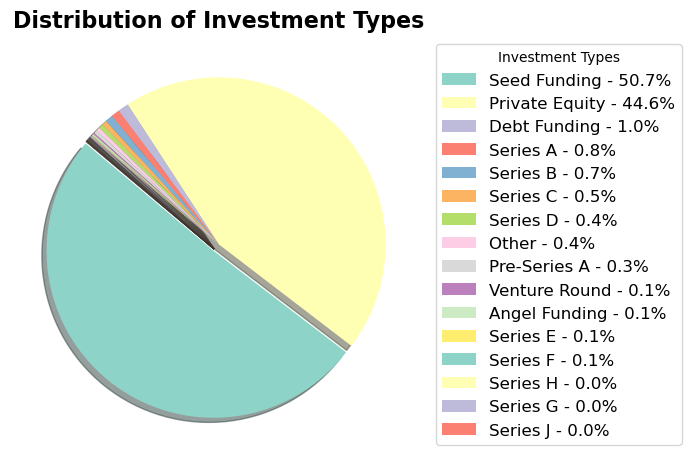

In [7]:
investment_counts = df['Investment_Type'].value_counts()
total = investment_counts.sum()
percentages = 100 * investment_counts / total

plt.figure(figsize=(7, 7))

# Color palette
colors = sns.color_palette('Set3')[0:len(investment_counts)]

# Explode first slice slightly for emphasis
explode = [0.05] + [0] * (len(investment_counts) - 1)

# Pie chart without percentages on slices
wedges, texts = plt.pie(
    investment_counts,
    labels=None,  # No labels on slices
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

# Build legend labels with percentage values
legend_labels = [f'{label} - {percent:.1f}%' for label, percent in zip(investment_counts.index, percentages)]

# Add title with bold font
plt.title('Distribution of Investment Types', fontsize=16, weight='bold')

# Legend with percentages
plt.legend(
    wedges,
    legend_labels,
    title='Investment Types',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()


### Insights

Investment Type Insights:

- Seed Funding (50.7%): Most common; reflects early-stage boom post-2015, backed by Startup India.
- Private Equity (44.6%): Strong late-stage interest; big rounds for startups like Flipkart, BYJU’S, Paytm.
- Debt (1.0%): Used by fintechs and capital-heavy models for efficient growth.
- Others (~3%): Few startups reached Series A–H; shows early-stage drop-off or pivots.

## Word cloud of most frequent investor names 

### Graph

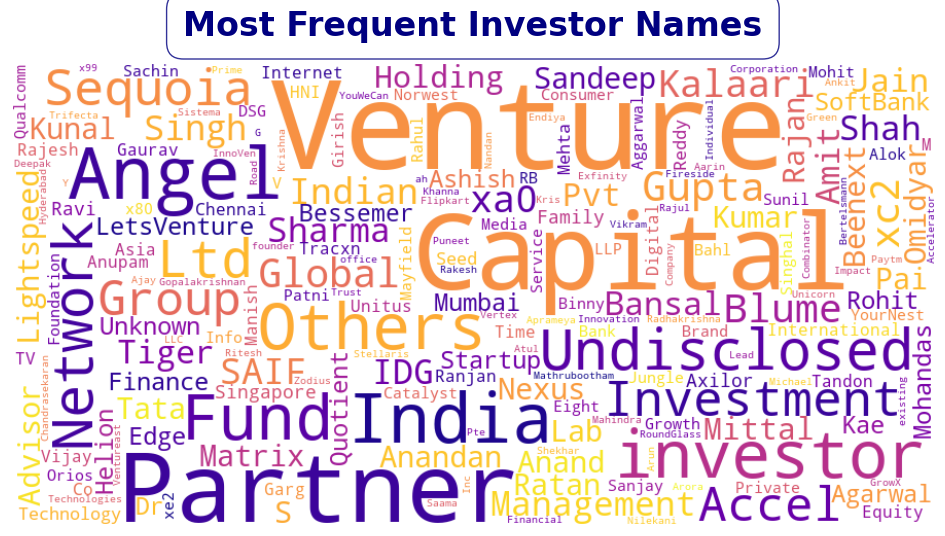

In [11]:
# Combine all investor names into one string
investor_text = ' '.join(df['Investors_Name'].dropna().astype(str))

# Generate word cloud with refined styling
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color='white',
    colormap='plasma',      # smooth, vibrant colors
    contour_color='steelblue',
    contour_width=1.5,
    max_font_size=120,
    min_font_size=10,
    random_state=42,
    collocations=False      # avoid duplicate words
).generate(investor_text)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Title with a shadow effect for better visibility
plt.title('Most Frequent Investor Names', fontsize=24, fontweight='bold', color='navy', pad=20,
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='navy', boxstyle='round,pad=0.5'))

plt.tight_layout(pad=3)
plt.show()


### Insights

Key Startup Investors (2015–2020):

- Global VCs Dominate: Sequoia, Accel, Tiger Global, SoftBank led major deals (Flipkart, BYJU’S, Swiggy).
- Rise of Indian Angels & Micro-VCs: Blume, Kalaari, Sanjay Mehta supported early-stage growth post-Startup India.
- Corporate Giants Join In: Google, Facebook, Reliance made strategic moves — e.g., Facebook’s 2020 investment in Jio.

## Count plot of startups per funding round (Seed, Series A, etc.) 

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_10028\614527904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')


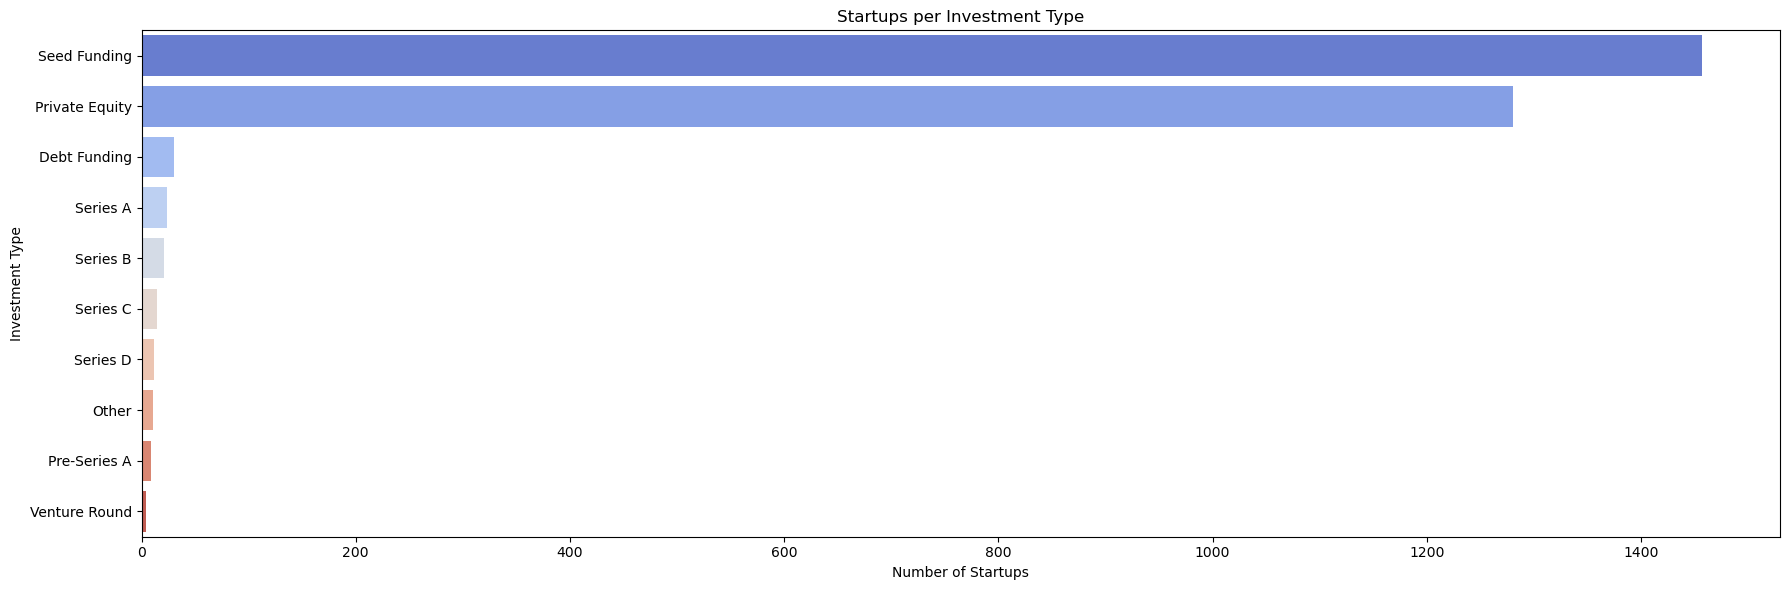

In [9]:
plt.figure(figsize=(18, 6))
top_types = df['Investment_Type'].value_counts().head(10)
sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')
plt.title("Startups per Investment Type")
plt.xlabel("Number of Startups")
plt.ylabel("Investment Type")
plt.tight_layout()
plt.show()

### Insights

Startups by Investment Type:

- Seed Funding leads: Most startups got early-stage backing, driven by angel investors, accelerators, and Startup India schemes.
- Private Equity: Marks India’s shift toward mature, high-growth ventures.
- Other Types (Series A–H, Angel, etc.): Fewer in number, showing many startups struggle to scale beyond seed stage.

## Correlation analysis between funding amount and number of investors 

### Graph

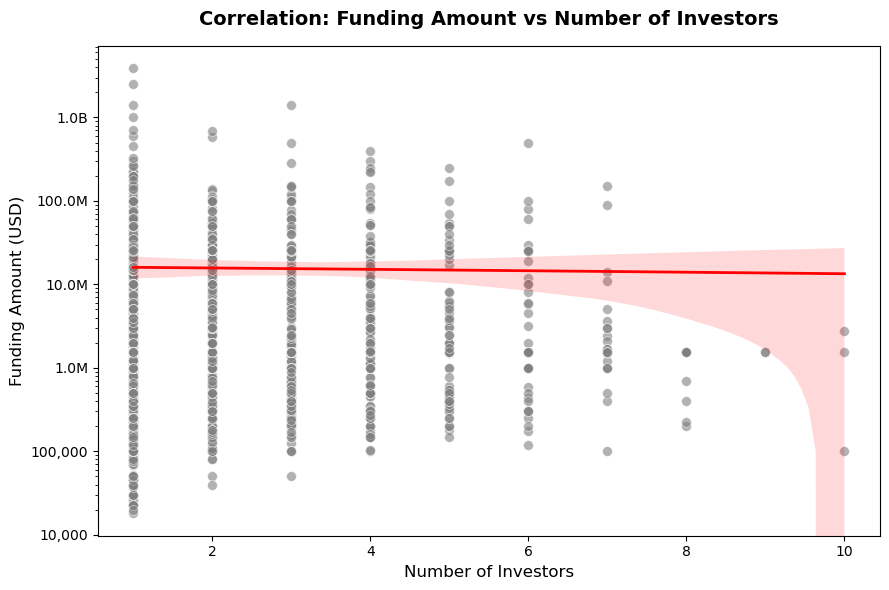

In [10]:
# Filter out non-positive funding amounts (log scale can't handle 0 or negative)
df_filtered = df[df['Amount_USD'] > 0].copy()

plt.figure(figsize=(9, 6))

# Scatterplot
sns.scatterplot(data=df_filtered,x='investor_count',y='Amount_USD',alpha=0.6,s=50,color='grey')

# Regression line
sns.regplot(data=df_filtered,x='investor_count',y='Amount_USD',scatter=False,color='red',line_kws={'linewidth': 2}
)

# Log scale on y-axis
plt.yscale('log')

# Human-friendly y-axis tick labels (e.g., 1M, 1B)
def format_large_ticks(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    else:
        return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_large_ticks))

# Titles and axis labels
plt.title('Correlation: Funding Amount vs Number of Investors', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Investors', fontsize=12)
plt.ylabel('Funding Amount (USD)', fontsize=12)

plt.tight_layout()
plt.show()


### Insights

Funding Amount vs Number of Investors:

- Positive Correlation: More investors usually mean higher funding—typical in Series B+ rounds.
- Early-Stage Cluster: Most deals have 1–3 investors with modest funding (Seed/Angel stage).
- High Outliers: Mega-deals (e.g., Flipkart, BYJU’S) show high funding with 5+ investors.


<a href="https://colab.research.google.com/github/ranshull/Analyzing-Startup-Ecosystem-and-Funding-Trends-in-India/blob/main/notebooks/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descriptive Statistics:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/cleaned2_Startup_funding.csv')
df

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,No Remark,2020,High,1
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,25000000.0,Late Stage,2015,High,1
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,1529113.0,No Remark,2015,Medium,1
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,25795550.0,Series D,2015,High,2
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,10000000.0,Series B,2015,Medium,1




---


Mean, median, standard deviation of funding amount


---



In [4]:
mean_amt = df['Amount_USD'].mean()
median_amt = df['Amount_USD'].median()
std_amt = df['Amount_USD'].std()

print(f"Mean: ${mean_amt:,.2f}")
print(f"Median: ${median_amt:,.2f}")
print(f"Standard Deviation: ${std_amt:,.2f}")


Mean: $15,738,873.52
Median: $1,529,113.00
Standard Deviation: $103,159,141.72


 - Highly Right-Skewed Distribution : Mean >> Median again

 - Insight: Most startups get modest funding, but a few unicorns like BYJU’S or Zomato raise very high amounts, distorting the average.

In [5]:
#varience, std and mad comparison

num_df = df.select_dtypes(include='number')

# Variance
variance = num_df.var()
print("Variance:\n", variance)

# Standard Deviation
std_dev = num_df.std()
print("\nStandard Deviation:\n", std_dev)

# MAD
mad= np.mean(np.abs(num_df-np.mean(num_df)))
print(f'mean absolute deviation :{round(mad,2)}')


Variance:
 Amount_USD        1.064181e+16
Year              1.225342e+00
investor_count    2.023644e+00
dtype: float64

Standard Deviation:
 Amount_USD        1.031591e+08
Year              1.106952e+00
investor_count    1.422548e+00
dtype: float64
mean absolute deviation :8773869.2



  - STD (Amount_USD) = 103 million
  - MAD (Amount_USD) = 8.77 million

This big gap shows:
 - A few startups raised huge amounts (very far from the mean),
 - While most are closer to the average


---





---


Create summary tables: Avg. funding per industry per year


---



In [6]:
summary_table = df.groupby(['Industry_Vertical', 'Year'])['Amount_USD'].mean().reset_index()
summary_table.rename(columns={'Amount_USD': 'Avg_Funding'}, inplace=True)
summary_table.sort_values(by='Avg_Funding', ascending=False, inplace=True)

tt= summary_table.head(5)
tt

,Industry_Vertical,Year,Avg_Funding
5,B2B,2019,5.850000e+08
3,Automation,2018,3.000000e+08
24,EdTech,2020,2.000000e+08
47,Hospitality,2020,1.500000e+08
14,ECommerce,2015,1.166295e+08


/tmp/ipython-input-1548797527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tt, x='Avg_Funding', y='Industry_Vertical', palette='viridis')


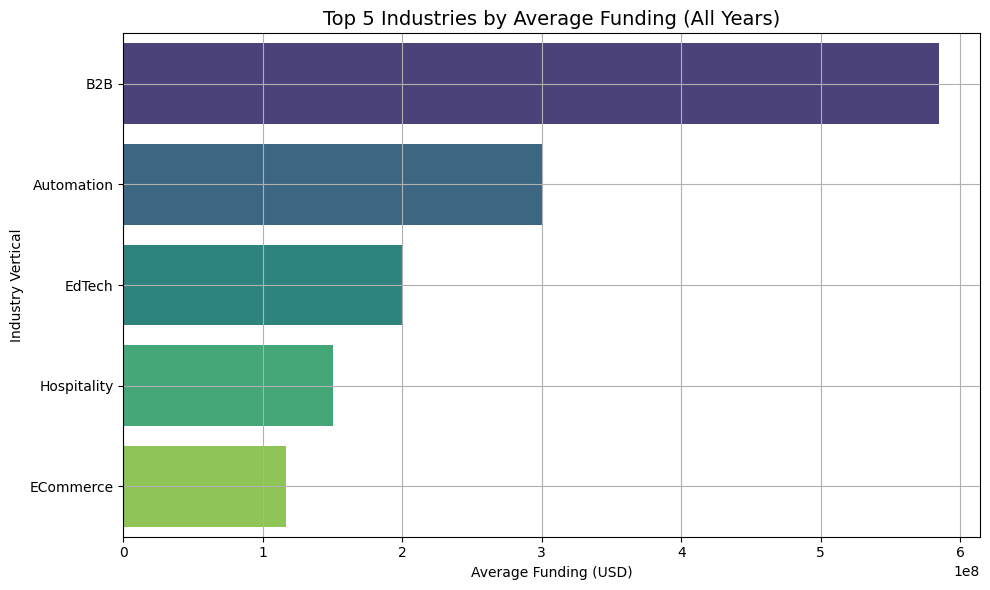

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tt, x='Avg_Funding', y='Industry_Vertical', palette='viridis')
plt.title('Top 5 Industries by Average Funding (All Years)', fontsize=14)
plt.xlabel('Average Funding (USD)')
plt.ylabel('Industry Vertical')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Key Industry-Year Funding Insights
-  **B2B (2019)**:  Avg. funding of $58.5M — highest in the dataset, likely due to enterprise SaaS, logistics, and fintech infra boom post-2018.

-  **Automation (2018)**: $ 30 M avg. funding indicates rising interest in robotics & AI automationh before COVID-19.

-  **EdTech (2020)**: $ 20M avg. reflects pandemic-driven boom in e-learning; likely led by BYJU’S and similar platforms.

- **Hospitality (2020)**:  $ 15M avg. despite COVID; possibly due to pre-lockdown deals or rise in home-stay tech.

- **ECommerce (2015)**: $ 11.6M avg. funding points to early growth phase, with major backing for players like Flipkart, Myntra.( In May 2014, Myntra.com was acquired by Flipkart.)




---


Calculate coefficient of variation by city and industry
 - CV tells you how "messy" or "spread out" your data is compared to the average.


---



In [8]:
cv_by_city = df.groupby('City_Location')['Amount_USD'].agg(['mean', 'std'])
cv_by_city['CV'] = cv_by_city['std'] / cv_by_city['mean']
cv_by_city = cv_by_city.sort_values('CV')
cv_by_city.head()

,mean,std,CV
City_Location,,,
Agra,1.529113e+06,0.000000e+00,0.000000
Bhubaneswar,2.439778e+07,1.976752e+06,0.081022
Gwalior,4.500000e+05,7.071068e+04,0.157135
Coimbatore,1.097343e+06,7.166764e+05,0.653102
Nagpur,1.067075e+06,8.002727e+05,0.749968


In [9]:
cv_by_industry = df.groupby('Industry_Vertical')['Amount_USD'].agg(['mean', 'std'])
cv_by_industry['CV'] = cv_by_industry['std'] / cv_by_industry['mean']
cv_by_industry = cv_by_industry.sort_values('CV')
cv_by_industry.head()

,mean,std,CV
Industry_Vertical,,,
Marketplace,1.529113e+06,0.000000e+00,0.000000
Beauty,1.397186e+06,4.499930e+05,0.322071
Hospitality,8.875000e+07,6.060459e+07,0.682869
Media,1.973306e+06,1.620375e+06,0.821147
Home Decor,2.404764e+07,2.043209e+07,0.849651




---


 Most Stable vs. Most Volatile Cities/Industries


---



In [10]:
print("🔒 Most Stable Cities:")
print(cv_by_city.head(20)[['CV']])

print("\n🚨 Most Volatile Cities:")
print(cv_by_city.tail(20)[['CV']])

🔒 Most Stable Cities:
                     CV
City_Location          
Agra           0.000000
Bhubaneswar    0.081022
Gwalior        0.157135
Coimbatore     0.653102
Nagpur         0.749968
Vadodara       0.845620
Kolkata        0.998770
Kanpur         1.003731
Chandigarh     1.083649
Udupi          1.094534
Bhopal         1.160185
Kochi          1.255932
Siliguri       1.255932
Faridabad      1.294656
Surat          1.299672
Udaipur        1.360432
Trivandrum     1.403291
Chennai        1.502558
Ahmedabad      1.714187
Pune           1.848718

🚨 Most Volatile Cities:
                     CV
City_Location          
Goa            2.335436
Gurgaon        2.358188
Jaipur         2.484867
Mumbai         3.002712
New Delhi      3.955996
Noida          5.802924
Bangalore      7.245499
Amritsar            NaN
Belgaum             NaN
Gaya                NaN
Hubli               NaN
Jodhpur             NaN
Karur               NaN
Kozhikode           NaN
Lucknow             NaN
Panaji           

 1. Bangalore Is the Most Volatile City
   - CV of 7.24 shows extreme funding variability — from tiny seed rounds to massive unicorn-level deals.
   - Indicates a hyper-competitive and diverse funding ecosystem.

 2. Agra and Bhubaneswar Are the Most Stable
   -CVs near 0 mean startups received very similar funding amounts.
   - Reflects uniform investor behavior or few startups with consistent backing


---



REASON FOR NAN:

In [11]:
nan_cv_groups = cv_by_city[cv_by_city['CV'].isna()]
print(nan_cv_groups)

                      mean  std  CV
City_Location                      
Amritsar          300000.0  NaN NaN
Belgaum           500000.0  NaN NaN
Gaya             6000000.0  NaN NaN
Hubli            1529113.0  NaN NaN
Jodhpur           160000.0  NaN NaN
Karur            1529113.0  NaN NaN
Kozhikode       25795550.0  NaN NaN
Lucknow          1000000.0  NaN NaN
Panaji            825000.0  NaN NaN
Rourkela         2500000.0  NaN NaN
Srinagar         1529113.0  NaN NaN
Tulangan       200000000.0  NaN NaN
Varanasi           52000.0  NaN NaN


In [12]:
city_loc_count=df['City_Location'].value_counts()
print(city_loc_count)

City_Location
Bangalore      854
Mumbai         574
New Delhi      464
Gurgaon        338
Pune           112
Hyderabad      101
Chennai         99
Noida           93
Unknown         51
Ahmedabad       41
Jaipur          30
Kolkata         22
Indore          13
Chandigarh      11
Goa             11
Vadodara        10
Coimbatore       5
Kanpur           4
Faridabad        3
Bhopal           3
Nagpur           3
Agra             2
Kochi            2
Udupi            2
Surat            2
Bhubaneswar      2
Udaipur          2
Siliguri         2
Gwalior          2
Trivandrum       2
Tulangan         1
Srinagar         1
Rourkela         1
Amritsar         1
Karur            1
Panaji           1
Gaya             1
Kozhikode        1
Hubli            1
Lucknow          1
Varanasi         1
Jodhpur          1
Belgaum          1
Name: count, dtype: int64


---- INSIGHTS ----
 - Top cities like Bangalore and Mumbai receive the majority of startup funding.
 - Funding variation is low in stable sectors like Marketplace and cities like Agra.
 - Funding data is skewed with many outliers, requiring log transformation.
 -Several smaller cities have only one startup, showing weak ecosystem presence.

In [13]:
print("\n🔒 Most Stable Industries:")
print(cv_by_industry.head(3)[['CV']])

print("\n🚨 Most Volatile Industries:")
print(cv_by_industry.tail(3)[['CV']])



🔒 Most Stable Industries:
                         CV
Industry_Vertical          
Marketplace        0.000000
Beauty             0.322071
Hospitality        0.682869

🚨 Most Volatile Industries:
                   CV
Industry_Vertical    
Food & Beverage   NaN
Gaming            NaN
Retail            NaN


In [14]:
nan_cv_groups_ind = cv_by_industry[cv_by_industry['CV'].isna()]
print(nan_cv_groups_ind)

                          mean  std  CV
Industry_Vertical                      
Automation         300000000.0  NaN NaN
Food & Beverage     30000000.0  NaN NaN
Gaming               1300000.0  NaN NaN
Retail               1600000.0  NaN NaN


In [15]:
print(df['Industry_Vertical'].value_counts())


Industry_Vertical
Technology                 1356
Consumer Internet           944
ECommerce                   118
Healthcare                   84
FinTech                      83
FoodTech                     75
EdTech                       64
Logistics                    30
Fashion                      23
Real Estate                  11
Transport                    10
Beauty                        9
Analytics                     8
Services                      7
Auto                          7
Others                        6
Marketplace                   5
Consumer Goods                5
SaaS                          5
Home Decor                    4
Hospitality                   4
Media                         4
B2B                           3
CleanTech                     2
Artificial Intelligence       2
Retail                        1
Gaming                        1
Automation                    1
Food & Beverage               1
Name: count, dtype: int64


---- INSIGHTS ----
 - Tech and Consumer Internet dominate both your data and India’s real startup ecosystem.
 - Sectors like FinTech, EdTech, and Healthcare are strongly represented and reflect real growth.




---
Calculate IQR and detect funding outliers

---



In [16]:
Q1 = df['Amount_USD'].quantile(0.25)
Q3 = df['Amount_USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount_USD'] < lower_bound) | (df['Amount_USD'] > upper_bound)]

print(f"IQR: ${IQR:,.2f}")
print(f"Lower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")


IQR: $9,000,000.00
Lower Bound: $-12,500,000.00
Upper Bound: $23,500,000.00
Number of Outliers: 501


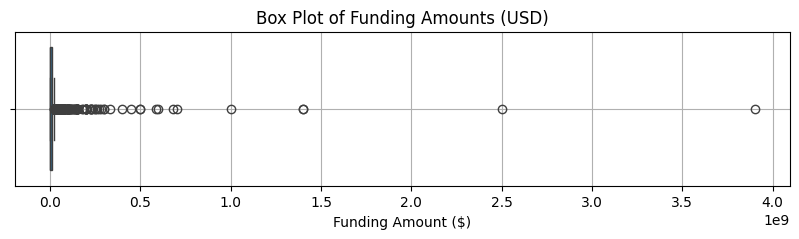

In [17]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Amount_USD'])
plt.title('Box Plot of Funding Amounts (USD)')
plt.xlabel('Funding Amount ($)')
plt.grid(True)
plt.show()


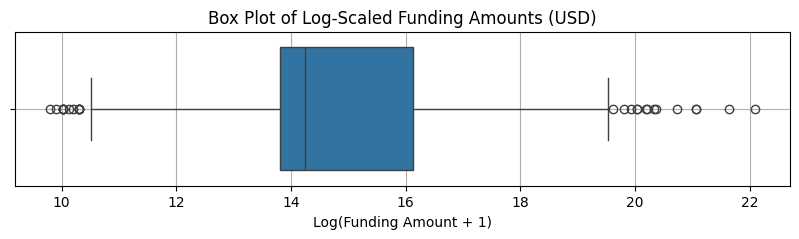

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=np.log1p(df['Amount_USD']))
plt.title('Box Plot of Log-Scaled Funding Amounts (USD)')
plt.xlabel('Log(Funding Amount + 1)')
plt.grid(True)
plt.show()

# Compresses large values
# Brings values onto a more normal scale
# Helps with box plots, regression, and clustering


- The left edge of the box (≈ 14) → Q1 ≈ $1.2M

- The right edge of the box (≈ 16) → Q3 ≈ $8.9M

- So the middle 50% of startups got funding between : approx dollar ~1.2M and ~8.9M




---

Determine top 3 sectors that received highest median investment post-2018

---



In [19]:
df_post2018 = df[df['Year'] > 2018]

median_by_sector = df_post2018.groupby('Industry_Vertical')['Amount_USD'].median().sort_values(ascending=False)
top_3_sectors = median_by_sector.head(3)

print("🏆 Top 3 Sectors (Median Funding Post-2018):")
top_3_sectors


🏆 Top 3 Sectors (Median Funding Post-2018):


,Amount_USD
Industry_Vertical,
B2B,585000000.0
Hospitality,150000000.0
Consumer Goods,73473550.0




---


- Top Cities for Funding

 - Bangalore

 - Mumbai

 - Delhi NCR


- Funding Stages

 - Most deals are seed or early-stage, showing investor interest in fast-growing startups.



---



----Business Insights----

- Important Sectors
 - B2B leads in total funding, showing strong investor interest in business-focused solutions.
 - Automation and EdTech received large funding amounts, indicating demand for innovation and digital transformation.

- Location Matters
 - Cities like Bangalore, Mumbai, and Delhi NCR offer better access to investors, talent, and startup networks — boosting chances of getting funded and growing quickly.

<a href="https://colab.research.google.com/github/ranshull/Analyzing-Startup-Ecosystem-and-Funding-Trends-in-India/blob/main/notebooks/Machine_learning_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/cleaned2_Startup_funding.csv')

In [4]:
df=data.copy()

LABELING CATEGORICAL DATA  FOR TRAINING

In [5]:
df['Industry_Vertical'].unique()

array(['EdTech', 'FinTech', 'Technology', 'Hospitality', 'FoodTech',
       'ECommerce', 'B2B', 'Consumer Goods', 'SaaS', 'Retail', 'Services',
       'Healthcare', 'Artificial Intelligence', 'Gaming',
       'Consumer Internet', 'Logistics', 'Real Estate', 'CleanTech',
       'Media', 'Automation', 'Others', 'Fashion', 'Transport', 'Beauty',
       'Auto', 'Marketplace', 'Analytics', 'Home Decor',
       'Food & Beverage'], dtype=object)

In [6]:
industry_encoding = {
    'EdTech': 0,
    'FinTech': 1,
    'Technology': 2,
    'Hospitality': 3,
    'FoodTech': 4,
    'ECommerce': 5,
    'B2B': 6,
    'Consumer Goods': 7,
    'SaaS': 8,
    'Retail': 9,
    'Services': 10,
    'Healthcare': 11,
    'Artificial Intelligence': 12,
    'Gaming': 13,
    'Consumer Internet': 14,
    'Logistics': 15,
    'Real Estate': 16,
    'CleanTech': 17,
    'Media': 18,
    'Automation': 19,
    'Others': 20,
    'Fashion': 21,
    'Transport': 22,
    'Beauty': 23,
    'Auto': 24,
    'Marketplace': 25,
    'Analytics': 26,
    'Home Decor': 27,
    'Food & Beverage': 28
}
df['Industry_Vertical_encoded'] = df['Industry_Vertical'].map(industry_encoding)


In [7]:
df['City_Location'].unique()

array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Noida', 'Unknown', 'Faridabad', 'Hyderabad', 'Tulangan', 'Bhopal',
       'Jaipur', 'Amritsar', 'Nagpur', 'Indore', 'Rourkela', 'Ahmedabad',
       'Bhubaneswar', 'Srinagar', 'Chandigarh', 'Coimbatore', 'Kolkata',
       'Udaipur', 'Surat', 'Kochi', 'Udupi', 'Karur', 'Gwalior', 'Goa',
       'Gaya', 'Vadodara', 'Trivandrum', 'Panaji', 'Agra', 'Hubli',
       'Kozhikode', 'Siliguri', 'Lucknow', 'Kanpur', 'Varanasi',
       'Jodhpur', 'Belgaum'], dtype=object)

In [8]:
city_encoding = {
    'Bangalore': 0,
    'New Delhi': 1,
    'Mumbai': 2,
    'Gurgaon': 3,
    'Chennai': 4,
    'Pune': 5,
    'Noida': 6,
    'Unknown': 7,
    'Faridabad': 8,
    'Hyderabad': 9,
    'Tulangan': 10,
    'Bhopal': 11,
    'Jaipur': 12,
    'Amritsar': 13,
    'Nagpur': 14,
    'Indore': 15,
    'Rourkela': 16,
    'Ahmedabad': 17,
    'Bhubaneswar': 18,
    'Srinagar': 19,
    'Chandigarh': 20,
    'Coimbatore': 21,
    'Kolkata': 22,
    'Udaipur': 23,
    'Surat': 24,
    'Kochi': 25,
    'Udupi': 26,
    'Karur': 27,
    'Gwalior': 28,
    'Goa': 29,
    'Gaya': 30,
    'Vadodara': 31,
    'Trivandrum': 32,
    'Panaji': 33,
    'Agra': 34,
    'Hubli': 35,
    'Kozhikode': 36,
    'Siliguri': 37,
    'Lucknow': 38,
    'Kanpur': 39,
    'Varanasi': 40,
    'Jodhpur': 41,
    'Belgaum': 42
}
df['City_Location_encoded'] = df['City_Location'].map(city_encoding)


In [9]:
df['Investment_Type'].unique()

array(['Private Equity', 'Pre-Series A', 'Seed Funding', 'Series C',
       'Series B', 'Series A', 'Series E', 'Series D', 'Series F',
       'Series H', 'Series G', 'Other', 'Debt Funding', 'Angel Funding',
       'Venture Round', 'Series J'], dtype=object)

In [10]:
investment_type_encoding = {
    'Private Equity': 0,
    'Pre-Series A': 1,
    'Seed Funding': 2,
    'Series C': 3,
    'Series B': 4,
    'Series A': 5,
    'Series E': 6,
    'Series D': 7,
    'Series F': 8,
    'Series H': 9,
    'Series G': 10,
    'Other': 11,
    'Debt Funding': 12,
    'Angel Funding': 13,
    'Venture Round': 14,
    'Series J': 15
}
df['Investment_Type_encoded'] = df['Investment_Type'].map(investment_type_encoding)


In [11]:
df.select_dtypes(include=np.number)

,Amount_USD,Year,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,200000000.0,2020,1,0,0,0
1,3000000.0,2020,1,1,1,1
2,1800000.0,2020,1,2,2,2
3,8048394.0,2020,1,2,3,3
4,18358860.0,2020,1,2,0,4
...,...,...,...,...,...,...
2868,25000000.0,2015,1,2,3,0
2869,1529113.0,2015,1,2,4,2
2870,25795550.0,2015,2,27,0,0
2871,10000000.0,2015,1,2,0,0


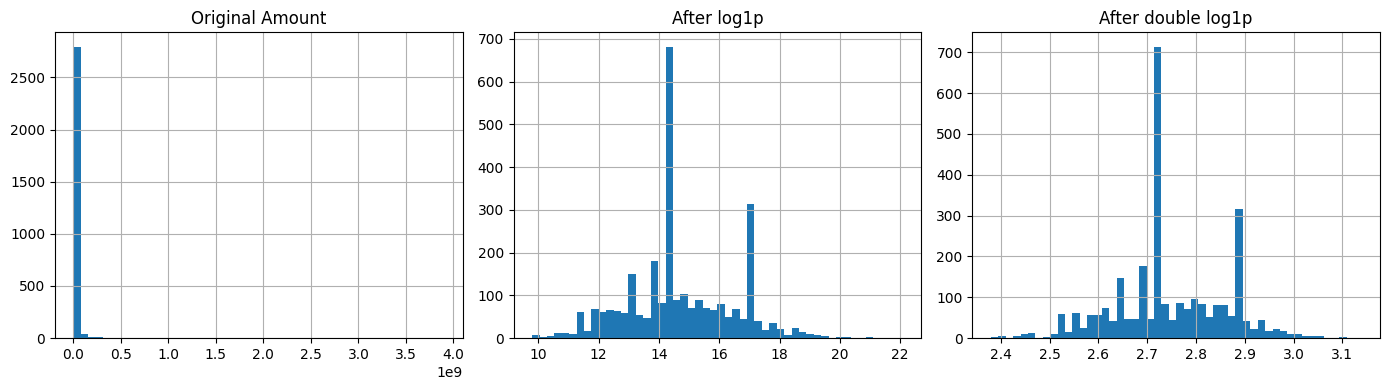

In [12]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4))

# 1. Original
plt.subplot(1, 3, 1)
df['Amount_USD'].hist(bins=50)
plt.title('Original Amount')

# 2. log1p
plt.subplot(1, 3, 2)
np.log1p(df['Amount_USD']).hist(bins=50)
plt.title('After log1p')

# 3. log1p(log1p)
plt.subplot(1, 3, 3)
np.log1p(np.log1p(df['Amount_USD'])).hist(bins=50)
plt.title('After double log1p')

# Show all at once
plt.tight_layout()
plt.show()


- Startup funding data is right-skewed — most companies raise small amounts, but a few raise huge sums.

- Applying log1p() compresses large values, making the distribution more balanced and normal.


---



In [13]:
df['Amount_USD'] = np.log1p(np.log1p(df['Amount_USD']))


In [14]:
#range of values in amount
df['Amount_USD'].describe()

,Amount_USD
count,2873.000000
mean,2.747486
std,0.114856
min,2.379378
25%,2.695675
50%,2.723937
75%,2.840136
max,3.139150


REMOVING OUTLIERS

In [15]:
data=df['investor_count']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers=df[(df['investor_count']>=lowwiskers) & (df['investor_count']<=highwiskers)]

no_outliers

IQR:1.0
lowwiskers:-0.5
highwiskers:3.5


,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,3.001408,No Remark,2020,High,1,0,0,0
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,2.767207,No Remark,2020,Medium,1,1,1,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,2.734582,No Remark,2020,Medium,1,2,2,2
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,2.827372,No Remark,2020,Medium,1,2,3,3
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,2.875011,No Remark,2020,High,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,2.892280,Late Stage,2015,High,1,2,3,0
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,2.723937,No Remark,2015,Medium,1,2,4,2
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,2.894016,Series D,2015,High,2,27,0,0
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,2.840136,Series B,2015,Medium,1,2,0,0


In [16]:
# Amount_USD outlier removal

data=no_outliers['Amount_USD']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers_amount = no_outliers[
    (no_outliers['Amount_USD'] >= lowwiskers) &
    (no_outliers['Amount_USD'] <= highwiskers)
]


IQR:0.14446142486671354
lowwiskers:2.4789825728602537
highwiskers:3.056828272327108


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 1. Prepare features and target
x = no_outliers_amount[['Industry_Vertical_encoded', 'City_Location_encoded', 'Investment_Type_encoded', 'investor_count', 'Year']]
y = no_outliers_amount['Amount_USD']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}

# 4. Train and evaluate each model
print("Model Performance (R² Score):")
print("----------------------------------")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:20s}: R² = {r2:.4f}")


Model Performance (R² Score):
----------------------------------
Linear Regression   : R² = 0.1514
Decision Tree       : R² = 0.3167
Random Forest       : R² = 0.4473
Gradient Boosting   : R² = 0.5317
KNN Regressor       : R² = 0.4058


Gradient Boosting has best r-score of 0.53.

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Replace with your best trained model
best_model = GradientBoostingRegressor()
best_model.fit(x_train, y_train)

# Predict on test set
y_pred = best_model.predict(x_test)

# Reverse log transforms if needed for evaluation (if target was transformed)
y_test_true = np.expm1(np.expm1(y_test))
y_pred_true = np.expm1(np.expm1(y_pred))

# Error Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📉 Regression Error Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")


new_input = np.array([[5, 3, 2, 4, 2021]])

# Make prediction
predicted_funding = best_model.predict(new_input)
predicted_amount = np.expm1(np.expm1(predicted_funding))



print("Predicted Funding Amount (USD):", predicted_funding)
print(f"Predicted Funding Amount (USD): ${predicted_amount[0]:,.2f}")

📉 Regression Error Metrics:
MAE  (Mean Absolute Error):      0.06
MSE  (Mean Squared Error):       0.01
RMSE (Root Mean Squared Error):  0.08
R² Score (Coefficient of Determination): 0.5318
Predicted Funding Amount (USD): [2.7768189]
Predicted Funding Amount (USD): $3,498,433.43


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


RMSE = 0.08 (log scale) is quite good, meaning your predictions are consistently close on the transformed scale.

 R² = 0.53 is moderate — it’s not bad, but also not strong enough for high-accuracy tasks. It's okay for exploratory analysis or rough forecasting, but not ideal for precise funding prediction.

CLASSIFCATION

In [19]:
q1 = no_outliers_amount['Amount_USD'].quantile(0.33)
q2 = no_outliers_amount['Amount_USD'].quantile(0.66)

def balanced_category(amount):
    if amount <= q1:
        return 'Low'
    elif amount <= q2:
        return 'Medium'
    else:
        return 'High'

no_outliers_amount['amount_category_balanced'] = no_outliers_amount['Amount_USD'].apply(balanced_category)


/tmp/ipython-input-295199835.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_amount['amount_category_balanced'] = no_outliers_amount['Amount_USD'].apply(balanced_category)


In [20]:
# • Label encode categorical variables
no_outliers_amount['amount_category_balanced'].unique()


array(['High', 'Medium', 'Low'], dtype=object)

In [21]:
amount_category_encoding = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
no_outliers_amount['amount_category_encoded'] = no_outliers_amount['amount_category_balanced'].map(amount_category_encoding)

/tmp/ipython-input-2127186256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_amount['amount_category_encoded'] = no_outliers_amount['amount_category_balanced'].map(amount_category_encoding)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Features and target
from sklearn.preprocessing import StandardScaler


X = no_outliers_amount[['Industry_Vertical_encoded', 'Investment_Type_encoded', 'investor_count']]
y = no_outliers_amount['amount_category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42,),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),

}

# Print only accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.7894
Decision Tree: 0.8160
Random Forest: 0.8180
KNN: 0.8160
SVM: 0.8057


Random forest has the best accuracy.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Example mapping
class_mapping = {
    0: 'Low',
    1: 'Mid',
    2: 'High'
}

# Already trained model
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Example input - use correct feature order
new_data = [[2, 3, 1]]

# Predict class
rf_pred = rf_model.predict(new_data)[0]

# Map to label
rf_label = class_mapping.get(rf_pred, 'Unknown')

print(f"Prediction using Random Forest: {rf_pred} → {rf_label}")


Prediction using Random Forest: 2 → High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


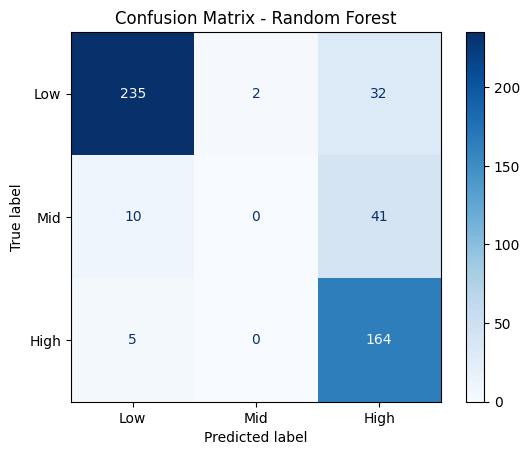

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = rf_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Class names if using encoded labels
class_names = ['Low', 'Mid', 'High']

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


- Low class is predicted quite well: 235 out of 269 correct (~87.4%).

- High class also performs strongly: 164 out of 169 correct (~96.4%).

- Mid class is poorly classified: Only 0 out of 51 predicted correctly .

which means we have to work on the model more on mid values.


Feature Importance:
                     Feature  Importance
1    Investment_Type_encoded    0.900246
0  Industry_Vertical_encoded    0.086404
2             investor_count    0.013350


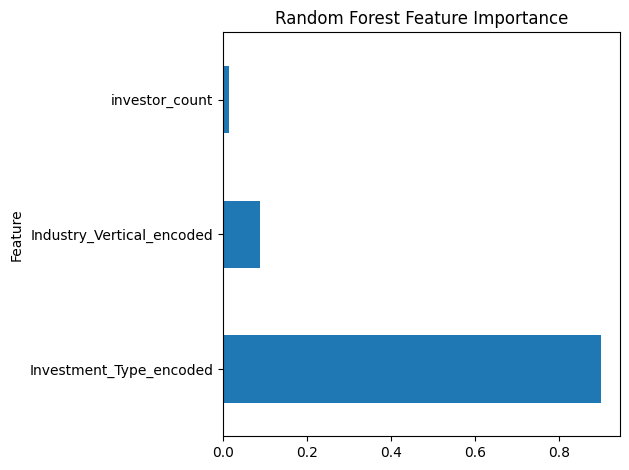

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_

# Assuming X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Optional plot
feature_importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


### SQL Operations - [Analyzing Startup Ecosystem and Funding Trends in India]

######

#### List top 10 most funded startups by total amount

In [ ]:
mysql> SELECT Startup_Name,SUM(Amount_USD) AS Total_Funding
       FROM cleaned_startup_funding GROUP BY Startup_Name
       ORDER BY Total_Funding DESC LIMIT 10;

+------------------+---------------+
| Startup_Name     | Total_Funding |
+------------------+---------------+
| Flipkart         |    4059700000 |
| Rapido Bike Taxi |    3900000000 |
| Paytm            |    3148950000 |
| Ola              |     984500000 |
| Udaan            |     870000000 |
| Flipkart.com     |     700000000 |
| Snapdeal         |     700000000 |
| Ola Cabs         |     695495550 |
| Oyo Rooms        |     610000000 |
| True North       |     600000000 |
+------------------+---------------+
10 rows in set (0.03 sec)

*	*The top-funded startups include Flipkart, Rapido Bike Taxi, Paytm, and Ola.*
*	*These startups are likely attracting large investments due to their high growth potential in their respective industries.*
*	*Businesses that solve large-scale, real-world problems (like e-commerce, mobility, and payments) attract significant funding.*

######

#### Identify cities with highest total and average funding

In [ ]:
mysql> SELECT City_Location, SUM(Amount_USD) AS Total_Funding, AVG(Amount_USD AS Average_Funding
       FROM cleaned_startup_funding
       GROUP BY City_Location ORDER BY Total_Funding DESC;

+------------------------+--------------------+--------------------+
| City_Location          | Total_Funding      | Average_Funding    |
+------------------------+--------------------+--------------------+
| Bangalore              |      20950043034.5 |   24589252.3879108 |
| Mumbai                 |         6533781413 | 11382894.447735192 |
| New Delhi              |         5210819883 | 11230215.265086208 |
| Gurgaon                |      4744492954.54 | 14036961.403964497 |
| Unknown                | 1887299838.6799998 |  41028257.36260869 |
| Noida                  |         1659471299 | 17843777.408602152 |
| Chennai                |         1083213843 | 10941553.969696969 |
| Pune                   |          989498888 |          8834811.5 |
| Hyderabad              |          595856453 |  5899568.841584158 |
| Faridabad              |          277795550 |  92598516.66666667 |
| Jaipur                 |          250000119 |          8333337.3 |
| Tulangan               |          200000000 |          200000000 |
| Ahmedabad              |          138330167 |  3373906.512195122 |
| San Jose               |          135000000 |          135000000 |
| Chandigarh             |          103278439 |            9388949 |
| Bhubaneswar            |           48795550 |           24397775 |
| Indore                 |           41171341 |  3167026.230769231 |
| Surat                  |           37759113 |         18879556.5 |
| Kolkata                |           34332356 | 1560561.6363636365 |
| Goa                    |           33833776 |          3383377.6 |
| Siliguri               |           27324663 |         13662331.5 |
| Kochi                  |           27324663 |         13662331.5 |
| Udaipur                |           26295550 |           13147775 |
| Trivandrum             |           25895550 |           12947775 |
| Kozhikode              |           25795550 |           25795550 |
| Usa                    |           25795550 |           25795550 |
| Us                     |           21129113 |  7043037.666666667 |
| Udupi                  |           13529113 |          6764556.5 |
| Baroda                 |           12890452 |          1289045.2 |
| Gaya                   |            6000000 |            6000000 |
| Coimbatore             |            5486713 |          1097342.6 |
| Kanpur                 |            3278226 |           819556.5 |
| Nagpur                 |            3201226 | 1067075.3333333333 |
| Agra                   |            3058226 |            1529113 |
| Bengaluru And Gurugram |            3000000 |            3000000 |
| Rourkela               |            2500000 |            2500000 |
| Bhopal                 |            2330665 |  776888.3333333334 |
| Hubli                  |            1529113 |            1529113 |
| Karur                  |            1529113 |            1529113 |
| Srinagar               |            1529113 |            1529113 |
| Lucknow                |            1000000 |            1000000 |
| Gwalior                |             900000 |             450000 |
| Panaji                 |             825000 |             825000 |
| Belgaum                |             500000 |             500000 |
| Mussoorie              |             350000 |             350000 |
| Amritsar               |             300000 |             300000 |
| Jodhpur                |             160000 |             160000 |
| Varanasi               |              52000 |              52000 |
+------------------------+--------------------+--------------------+
48 rows in set (0.01 sec)

*   *Bangalore is the city with the highest total funding and the highest average funding , ($20.95B) and ($24.59M) respectively.*
*	*Reason can be that the city houses numerous tech companies, startups, and accelerators, making it a natural magnet for investors and talents.*
*	*Investors might also prefer to fund companies in Bangalore due to its proven track record of nurturing successful startups.*

######

#### Count startups funded each year by investment type

In [ ]:
mysql> SELECT Year AS Funding_Year,Investment_Type, COUNT(DISTINCT Startup_Name) AS Funded_Startups
       FROM cleaned_startup_funding
       GROUP BY Funding_Year, Investment_Type ORDER BY Funding_Year, Investment_Type;

+--------------+-----------------+-----------------+
| Funding_Year | Investment_Type | Funded_Startups |
+--------------+-----------------+-----------------+
|         2015 | Private Equity  |             321 |
|         2015 | Seed Funding    |             406 |
|         2016 | Private Equity  |             368 |
|         2016 | Seed Funding    |             568 |
|         2017 | Angel Funding   |               1 |
|         2017 | Debt Funding    |              11 |
|         2017 | Private Equity  |             332 |
|         2017 | Seed Funding    |             300 |
|         2018 | Debt Funding    |              11 |
|         2018 | Other           |               4 |
|         2018 | Pre-Series A    |               3 |
|         2018 | Private Equity  |             142 |
|         2018 | Seed Funding    |             125 |
|         2018 | Series A        |               5 |
|         2018 | Series B        |               4 |
|         2018 | Series C        |               2 |
|         2018 | Series D        |               2 |
|         2018 | Series E        |               1 |
|         2019 | Angel Funding   |               2 |
|         2019 | Debt Funding    |               8 |
|         2019 | Other           |               7 |
|         2019 | Pre-Series A    |               5 |
|         2019 | Private Equity  |               5 |
|         2019 | Seed Funding    |              19 |
|         2019 | Series A        |              18 |
|         2019 | Series B        |              16 |
|         2019 | Series C        |               9 |
|         2019 | Series D        |              10 |
|         2019 | Series E        |               1 |
|         2019 | Series F        |               2 |
|         2019 | Series G        |               1 |
|         2019 | Series H        |               1 |
|         2019 | Series J        |               1 |
|         2019 | Venture Round   |               4 |
|         2020 | Pre-Series A    |               1 |
|         2020 | Private Equity  |               2 |
|         2020 | Seed Funding    |               1 |
|         2020 | Series A        |               1 |
|         2020 | Series B        |               1 |
|         2020 | Series C        |               1 |
+--------------+-----------------+-----------------+
40 rows in set (0.03 sec)

*	*Seed funding was the most common funding type, especially in 2015-17, but has since decreased.*
*	*Reason can be- in early years, many startups were still in development stage and attracted seed funding to build their products, and establish business models.*
*	*But as these businesses grew and they needed capital for scaling, expansion, and market capture,hence the need for larger rounds (Private Equity, Series A, B, C) became more prominent.*


######

#### Find most common combinations of investor and city

In [ ]:
mysql> SELECT Investors_Name,City_Location,COUNT(*) AS Frequency
       FROM cleaned_startup_funding
       GROUP BY Investors_Name, City_Location ORDER BY Frequency DESC LIMIT 10;

+------------------------+---------------+-----------+
| Investors_Name         | City_Location | Frequency |
+------------------------+---------------+-----------+
| Undisclosed investors  | Bangalore     |        20 |
| Undisclosed Investors  | Mumbai        |        19 |
| Unknown                | Mumbai        |        10 |
| Undisclosed investors  | New Delhi     |        10 |
| Indian Angel Network   | New Delhi     |         9 |
| Undisclosed investor   | New Delhi     |         9 |
| Undisclosed Investors  | Gurgaon       |         6 |
| Nexus Venture Partners | Bangalore     |         6 |
| SAIF Partners          | Bangalore     |         6 |
| Unknown                | Bangalore     |         6 |
+------------------------+---------------+-----------+
10 rows in set (0.03 sec)

*	*Most of the investors are Undisclosed, likely due to Confidentiality or privacy reasons.*
*	*Still startups in Bangalore, Mumbai, and New Delhi should be prioritized as these cities attract the most investors.*


######

#### Identify industries with highest median funding

In [ ]:
mysql> WITH IndustryFunding AS (
       SELECT Industry_Vertical, Amount_USD,
       ROW_NUMBER() OVER (PARTITION BY Industry_Vertical ORDER BY Amount_USD) AS RowAsc,
       COUNT(*) OVER (PARTITION BY Industry_Vertical) AS TotalCount
       FROM cleaned_startup_funding)
       SELECT Industry_Vertical, AVG(Amount_USD) AS MedianFunding
       FROM IndustryFunding
       WHERE RowAsc IN (CASE
        WHEN TotalCount % 2 = 1 THEN (TotalCount + 1) / 2
        WHEN TotalCount % 2 = 0 THEN (TotalCount / 2) + 1
        END)
       GROUP BY Industry_Vertical ORDER BY MedianFunding DESC;

+-------------------------+---------------+
| Industry_Vertical       | MedianFunding |
+-------------------------+---------------+
| Automation              |     300000000 |
| B2B                     |     225000000 |
| Hospitality             |     100000000 |
| Artificial Intelligence |      38080000 |
| SaaS                    |      26000000 |
| Analytics               |      11000000 |
| FinTech                 |       6000000 |
| ECommerce               |       4000000 |
| Retail                  |       1600000 |
| Consumer Internet       |       1529113 |
| EdTech                  |       1529113 |
| Healthcare              |       1529113 |
| Marketplace             |       1529113 |
| Media                   |       1529113 |
| Others                  |       1529113 |
| Real Estate             |       1529113 |
| Services                |       1529113 |
| Technology              |       1529113 |
| Consumer Goods          |        500000 |
+-------------------------+---------------+
19 rows in set (0.06 sec)

*	*Automation startups have the highest median funding, at $300M.*
*	*reason can be, that the demand for Automation technologies in industries like manufacturing, logistics, and IT is only increasing, leading to higher investments.*
*	*while looking to launch a startup, focusing on automation, Hospitality, AI, or B2B solutions will likely attract the most attention from investors as these fields are expected to generate long-term value and greater returns.*


######